# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
display(df)

market_id           created_at actual_delivery_time  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2             2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3             1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4             1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   
...           ...                  ...                  ...   
175772        1.0  2015-02-17 00:19:41  2015-02-17 01:02:41   
175773        1.0  2015-02-13 00:01:59  2015-02-13 01:03:59   
175774        1.0  2015-01-24 04:46:08  2015-01-24 05:32:08   
175775        1.0  2015-02-01 18:18:15  2015-02-01 19:03:15   
175776        1.0  2015-02-08 19:24:33  2015-02-08 20:01:33   

        store_primary_category  order_protocol  total_items  subtotal  \
0                            4             1.0            4      3441   
1                           46             2.0            1      1900   
2                           36             3.0            4      4771   
3                           38             1.0            1      1525   
4                           38             1.0            2      3620   
...                        ...             ...          ...       ...   
175772                      28             4.0            3      1389   
175773                      28             4.0            6      3010   
175774                      28             4.0            5      1836   
175775                      58             1.0            1      1175   
175776                      58             1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  
0          34.44  
1          27.60  
2          11.56  
3          31.80  
4           8.20  
...          ...  
175772     13.24  
175773     36.60  
175774     31.80  
175775     15.36  
175776      5.36  

[175777 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
display(df[['created_at', 'actual_delivery_time', 'time_taken']].head())

created_at actual_delivery_time  time_taken
0 2015-02-06 22:24:17  2015-02-06 23:11:17        47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25        44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35        55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46        59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour.astype('category')
df['order_day_of_week'] = df['created_at'].dt.dayofweek.astype('category')

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

In [ ]:
display(df.head())

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken order_hour  \
0                      21.0     34.44        47.0         22   
1                       2.0     27.60        44.0         21   
2                      18.0     11.56        55.0          0   
3                       8.0     31.80        59.0          3   
4                       7.0      8.20        46.0          2   

  order_day_of_week isWeekend  
0                 4         0  
1                 1         0  
2                 0         0  
3                 3         0  
4                 1         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [ ]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)
display(df)

market_id store_primary_category order_protocol  total_items  subtotal  \
0            1.0                      4            1.0            4      3441   
1            2.0                     46            2.0            1      1900   
2            2.0                     36            3.0            4      4771   
3            1.0                     38            1.0            1      1525   
4            1.0                     38            1.0            2      3620   
...          ...                    ...            ...          ...       ...   
175772       1.0                     28            4.0            3      1389   
175773       1.0                     28            4.0            6      3010   
175774       1.0                     28            4.0            5      1836   
175775       1.0                     58            1.0            1      1175   
175776       1.0                     58            1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  time_taken order_hour order_day_of_week isWeekend  
0          34.44        47.0         22                 4         0  
1          27.60        44.0         21                 1         0  
2          11.56        55.0          0                 0         0  
3          31.80        59.0          3                 3         0  
4           8.20        46.0          2                 1         0  
...          ...         ...        ...               ...       ...  
175772     13.24        43.0          0                 1         0  
175773     36.60        62.0          0                 4         0  
175774     31.80        46.0          4                 5         1  
175775     15.36        45.0         18                 6         1  
175776      5.36        37.0         19                 6         1  

[175777 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  order_hour                175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
y = df.pop('time_taken')
X = df

In [ ]:
display(X)

market_id store_primary_category order_protocol  total_items  subtotal  \
0            1.0                      4            1.0            4      3441   
1            2.0                     46            2.0            1      1900   
2            2.0                     36            3.0            4      4771   
3            1.0                     38            1.0            1      1525   
4            1.0                     38            1.0            2      3620   
...          ...                    ...            ...          ...       ...   
175772       1.0                     28            4.0            3      1389   
175773       1.0                     28            4.0            6      3010   
175774       1.0                     28            4.0            5      1836   
175775       1.0                     58            1.0            1      1175   
175776       1.0                     58            1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance order_hour order_day_of_week isWeekend  
0          34.44         22                 4         0  
1          27.60         21                 1         0  
2          11.56          0                 0         0  
3          31.80          3                 3         0  
4           8.20          2                 1         0  
...          ...        ...               ...       ...  
175772     13.24          0                 1         0  
175773     36.60          0                 4         0  
175774     31.80          4                 5         1  
175775     15.36         18                 6         1  
175776      5.36         19                 6         1  

[175777 rows x 15 columns]

In [ ]:
display(y)

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: time_taken, Length: 175777, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and testing sets, preserving index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(140621, 15)
(140621,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(35156, 15)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols_train = X_train.select_dtypes(include=np.number).columns
categorical_cols_train = X_train.select_dtypes(include='category').columns

print("Numerical columns:", numerical_cols_train.tolist())
print("Categorical columns:", categorical_cols_train.tolist())

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

<Figure size 1000x600 with 0 Axes>

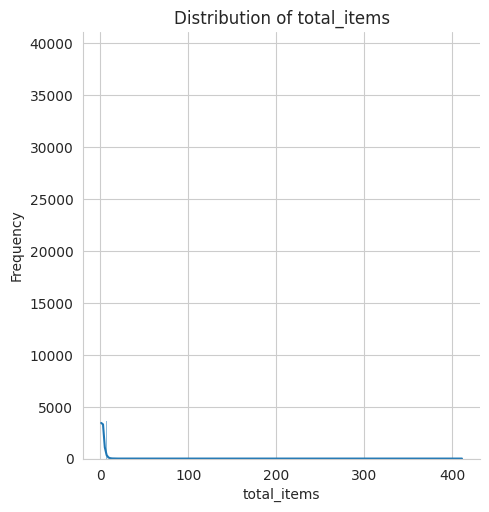

<Figure size 1000x600 with 0 Axes>

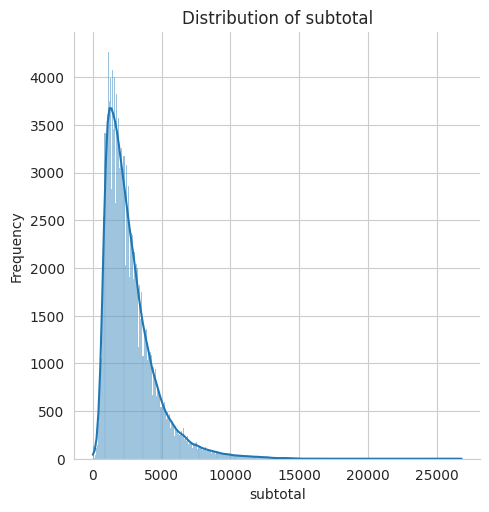

<Figure size 1000x600 with 0 Axes>

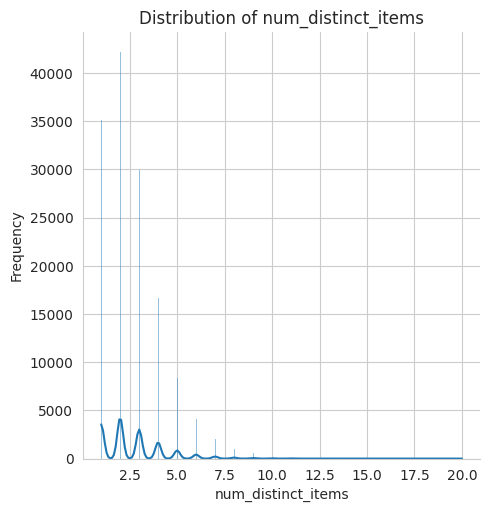

<Figure size 1000x600 with 0 Axes>

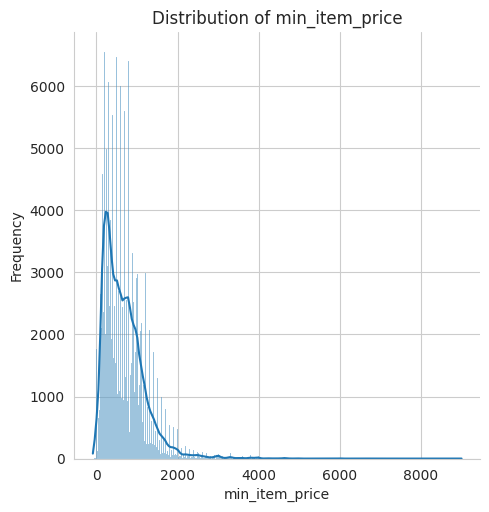

<Figure size 1000x600 with 0 Axes>

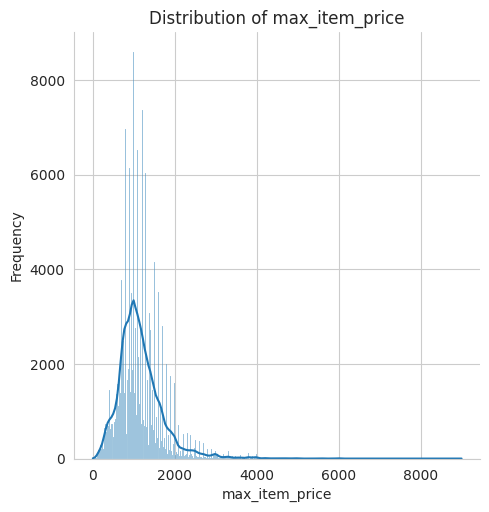

<Figure size 1000x600 with 0 Axes>

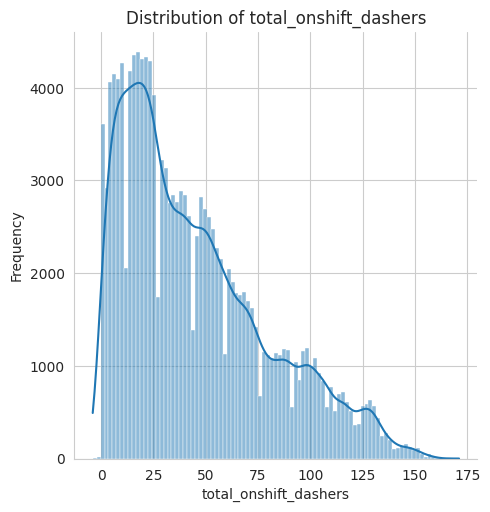

<Figure size 1000x600 with 0 Axes>

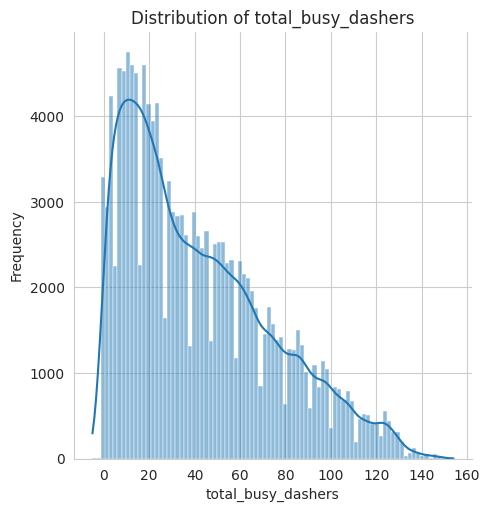

<Figure size 1000x600 with 0 Axes>

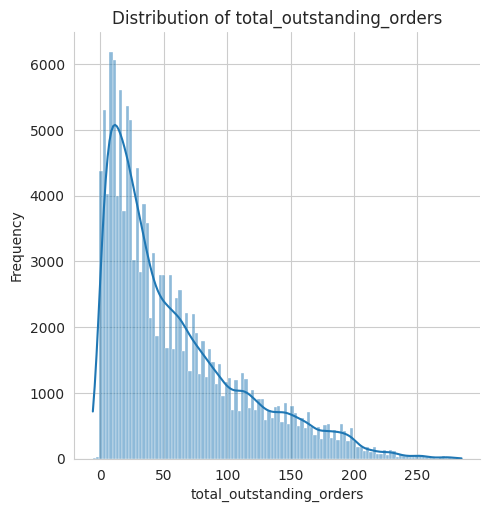

<Figure size 1000x600 with 0 Axes>

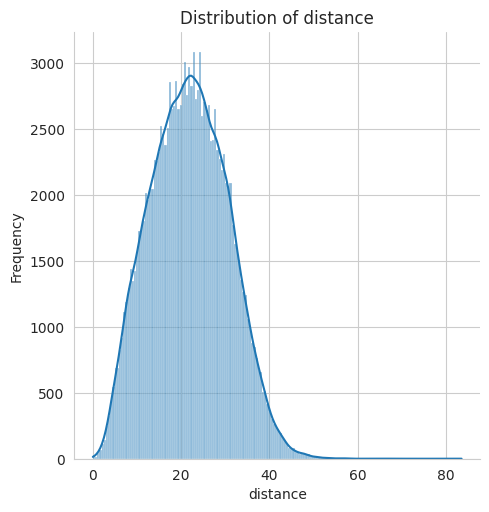

In [ ]:
# Plot distributions for all numerical columns
sns.set_style("whitegrid")
for col in numerical_cols_train:
    plt.figure(figsize=(10, 6))
    sns.displot(data=X_train, x=col, kde=True) # Using displot with kde=True for a smooth curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

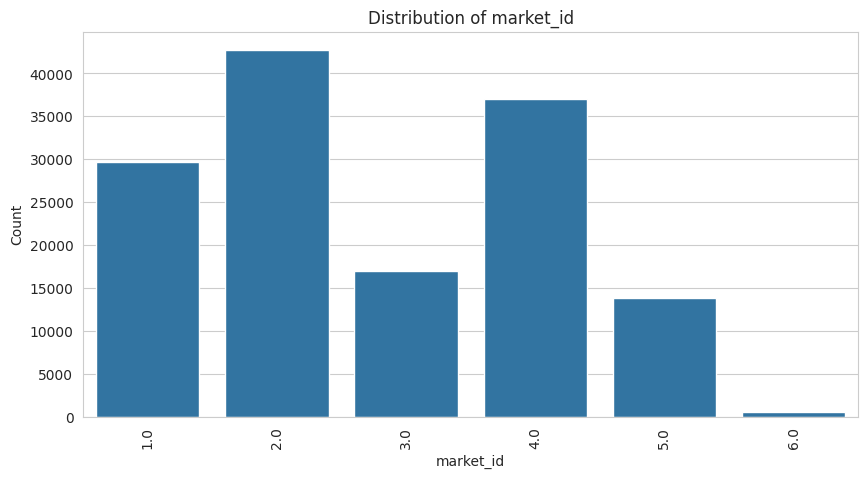

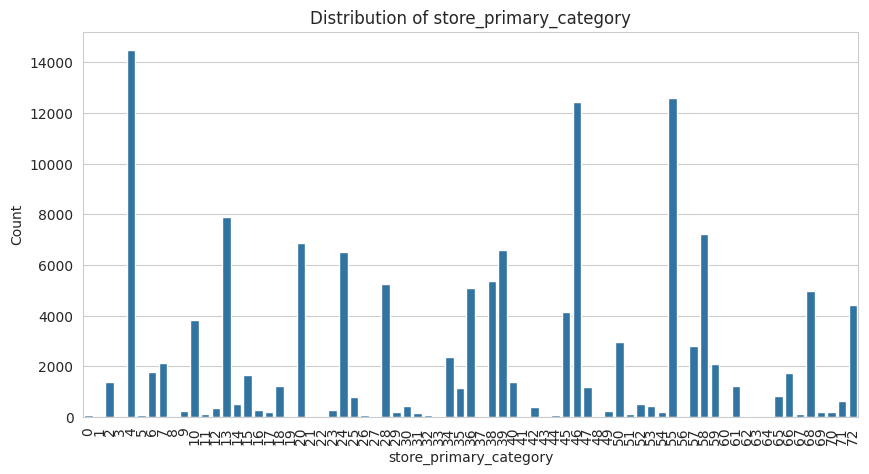

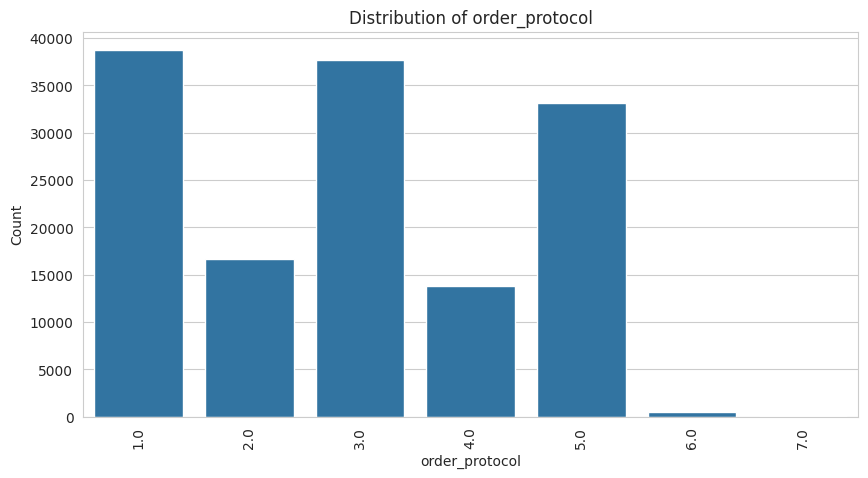

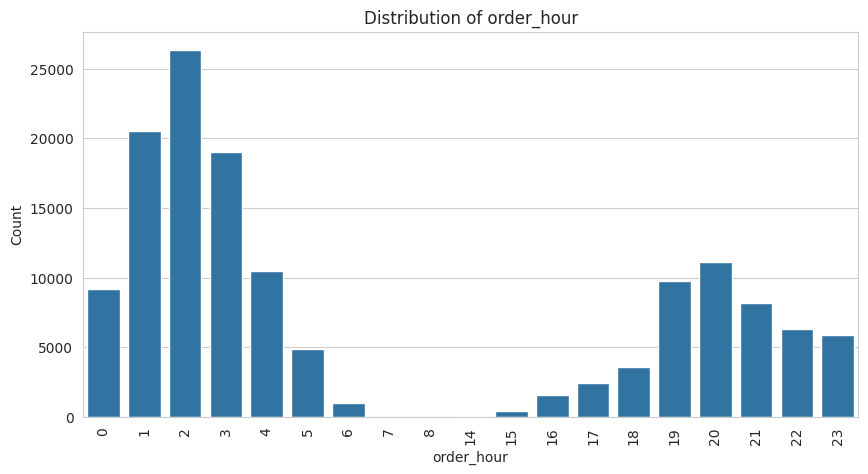

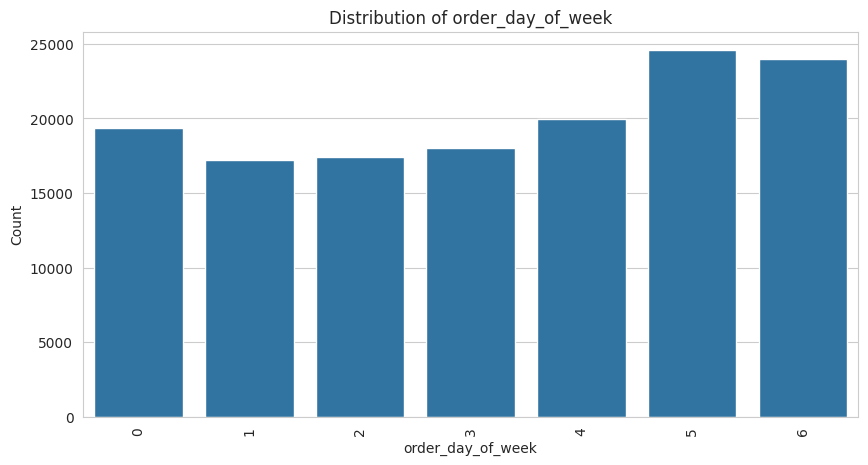

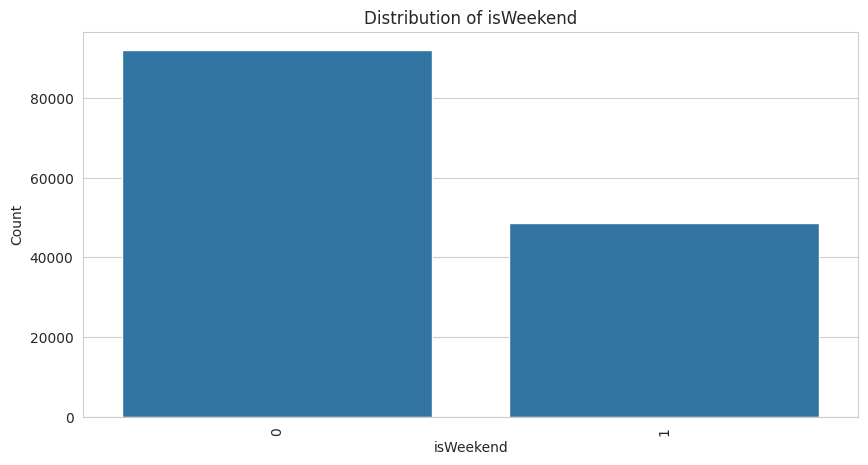

In [ ]:
# Distribution of categorical columns
for col in categorical_cols_train:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Figure size 1000x500 with 0 Axes>

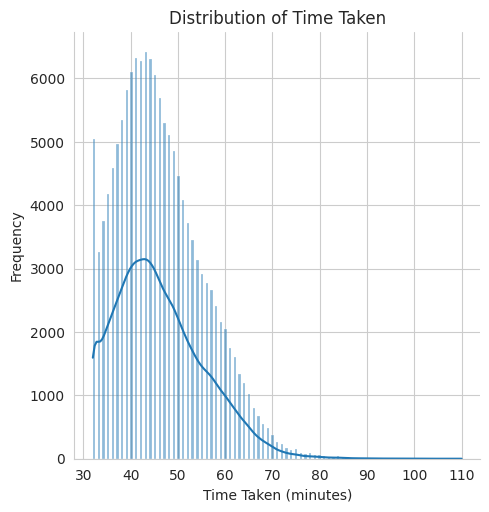

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.displot(y_train, kde=True)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

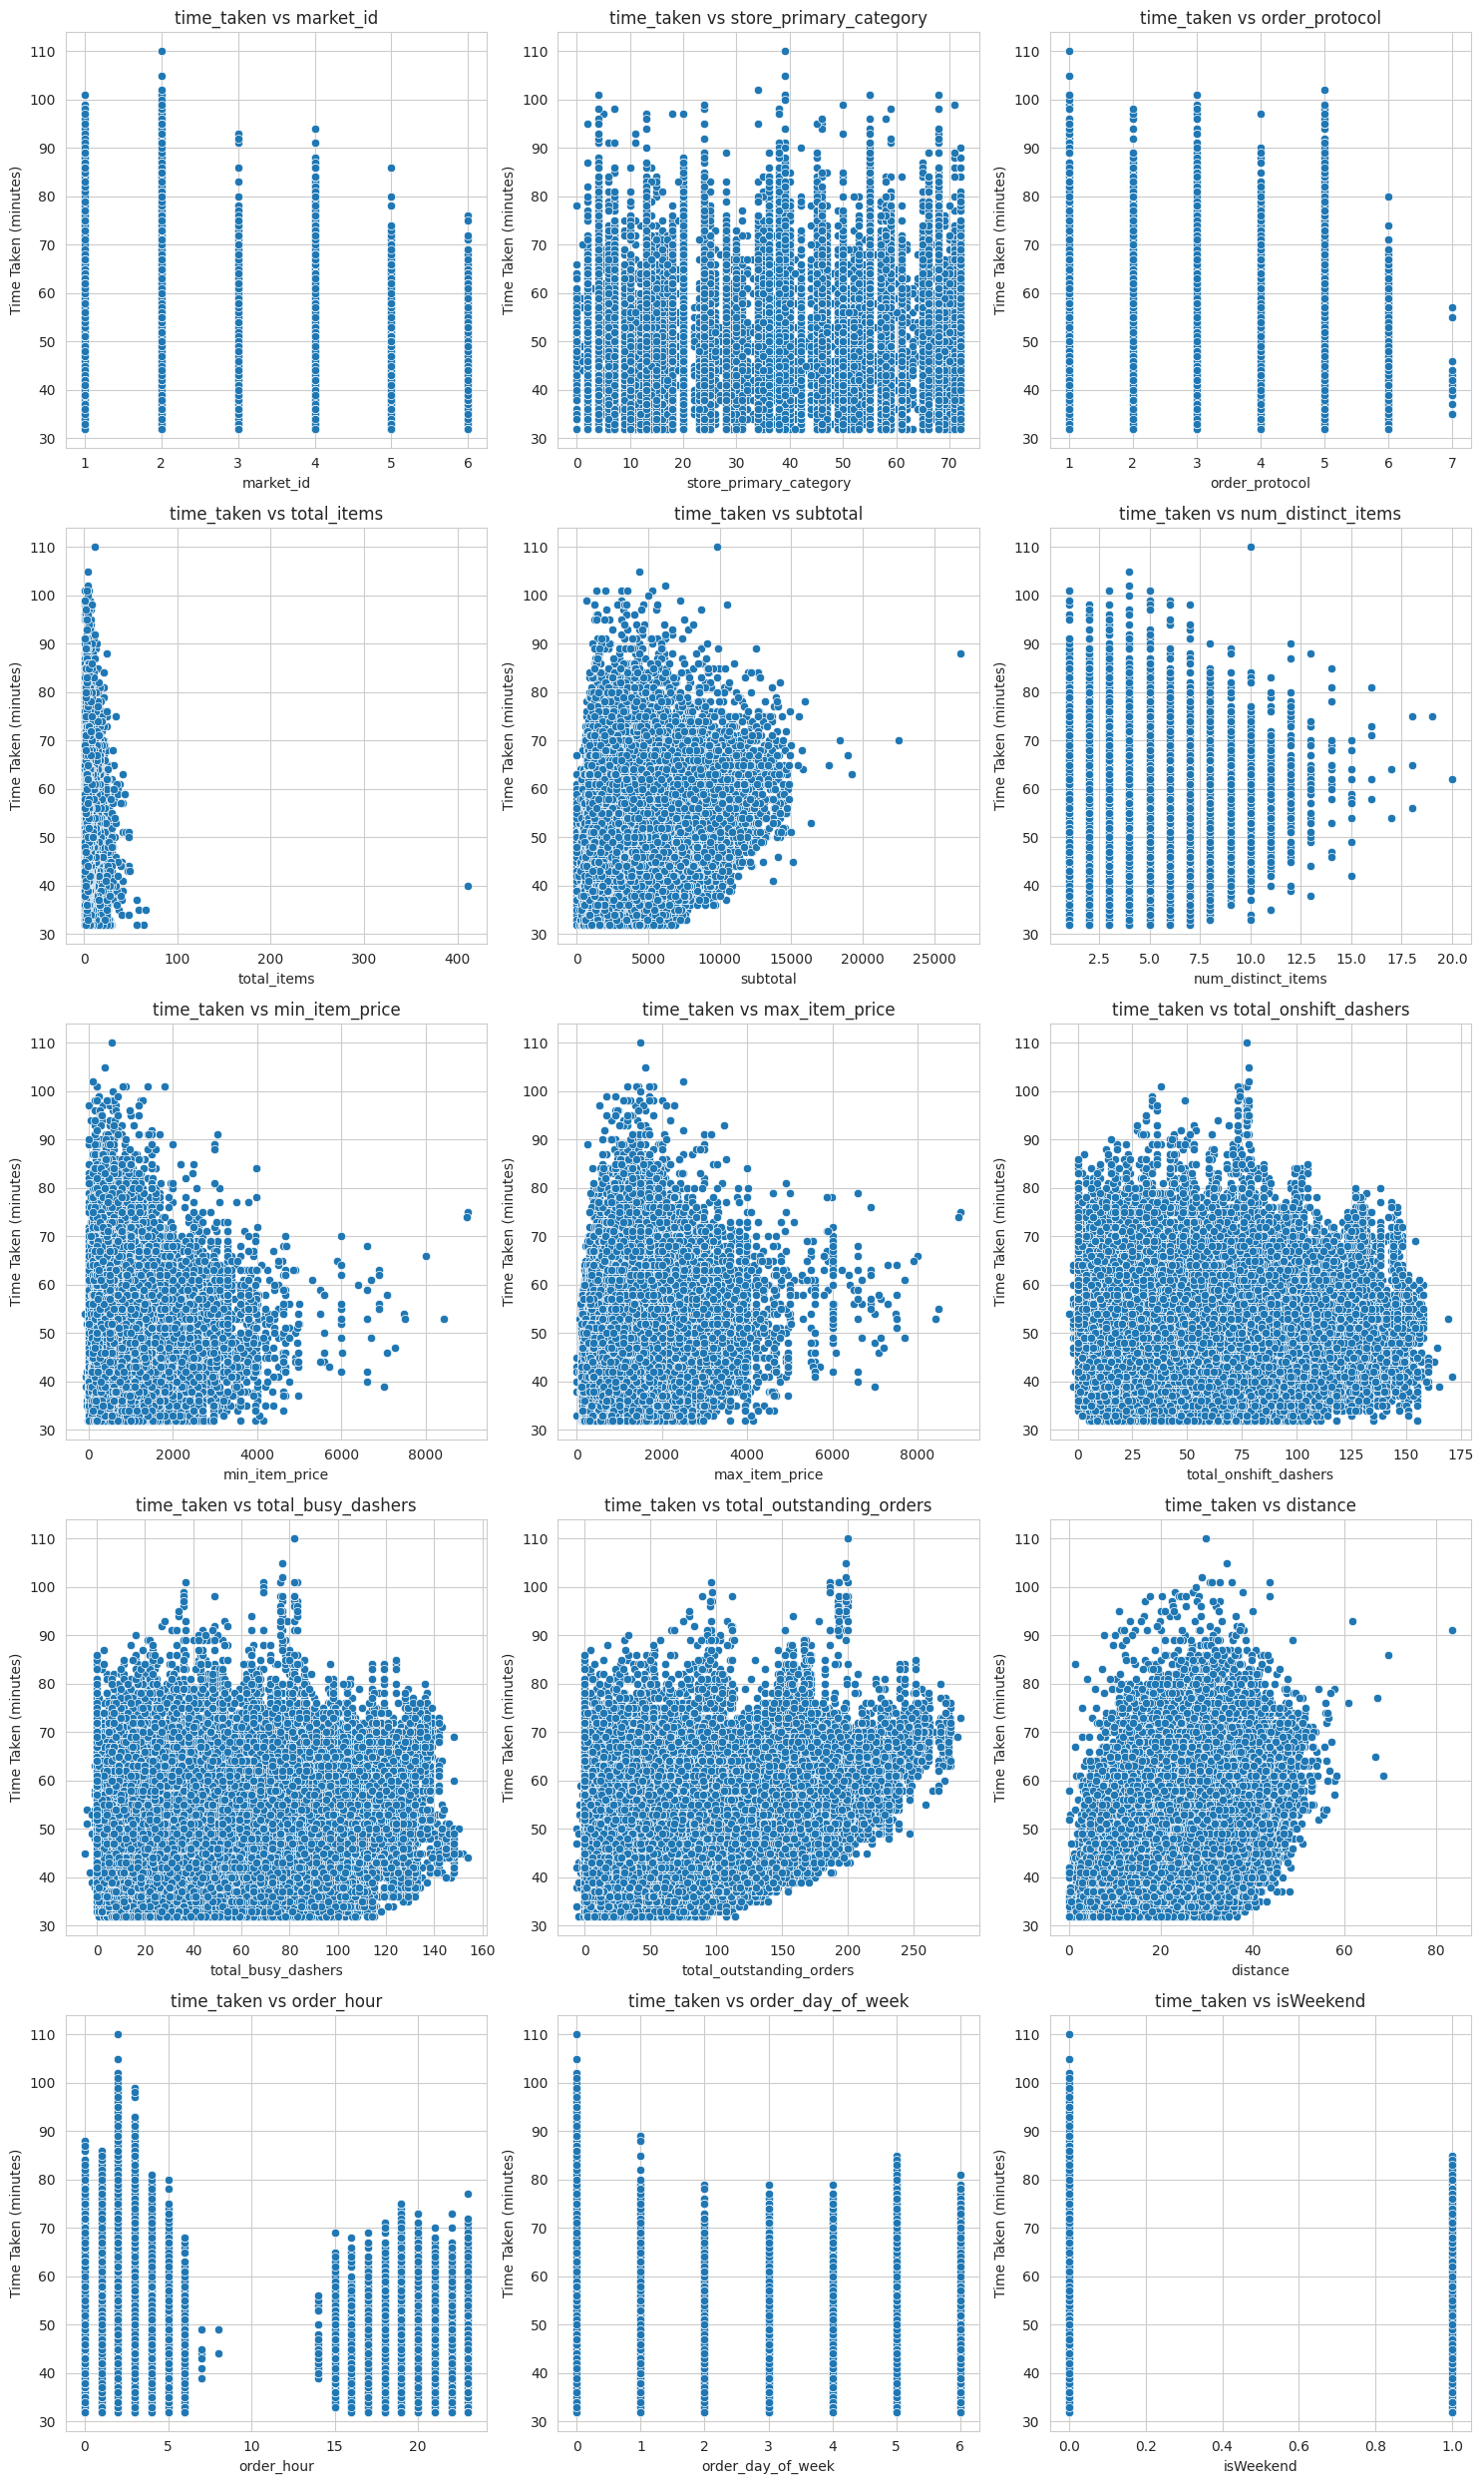

In [ ]:
# Scatter plot to visualise the relationship between time_taken and all numerical features

# Determine the number of plots and calculate grid dimensions
n_plots = len(X_train.columns)
n_cols = 3  # Number of columns in the grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, col in enumerate(X_train.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=col, y=y_train, data=X_train)
    plt.title(f'time_taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()

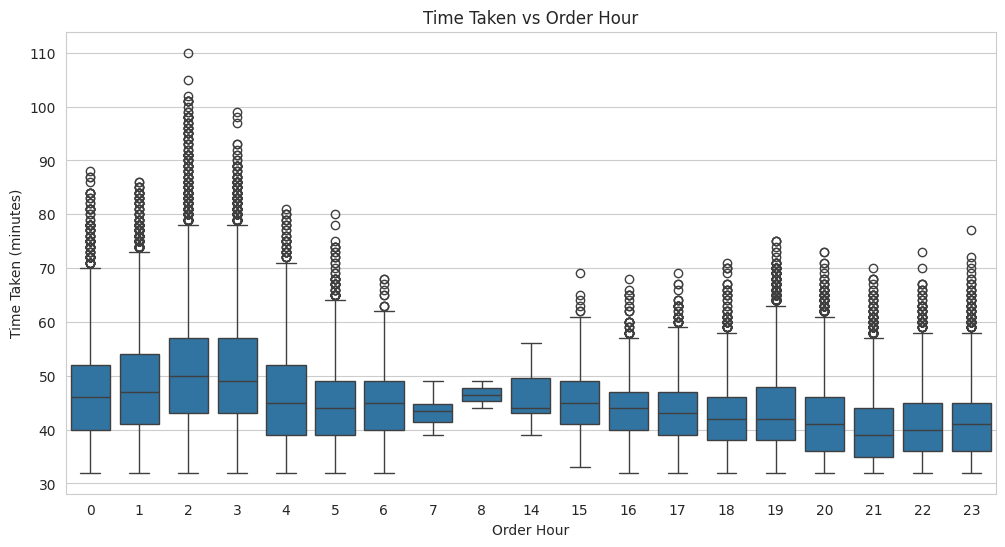

In [ ]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y=y_train, data=X_train)
plt.title('Time Taken vs Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

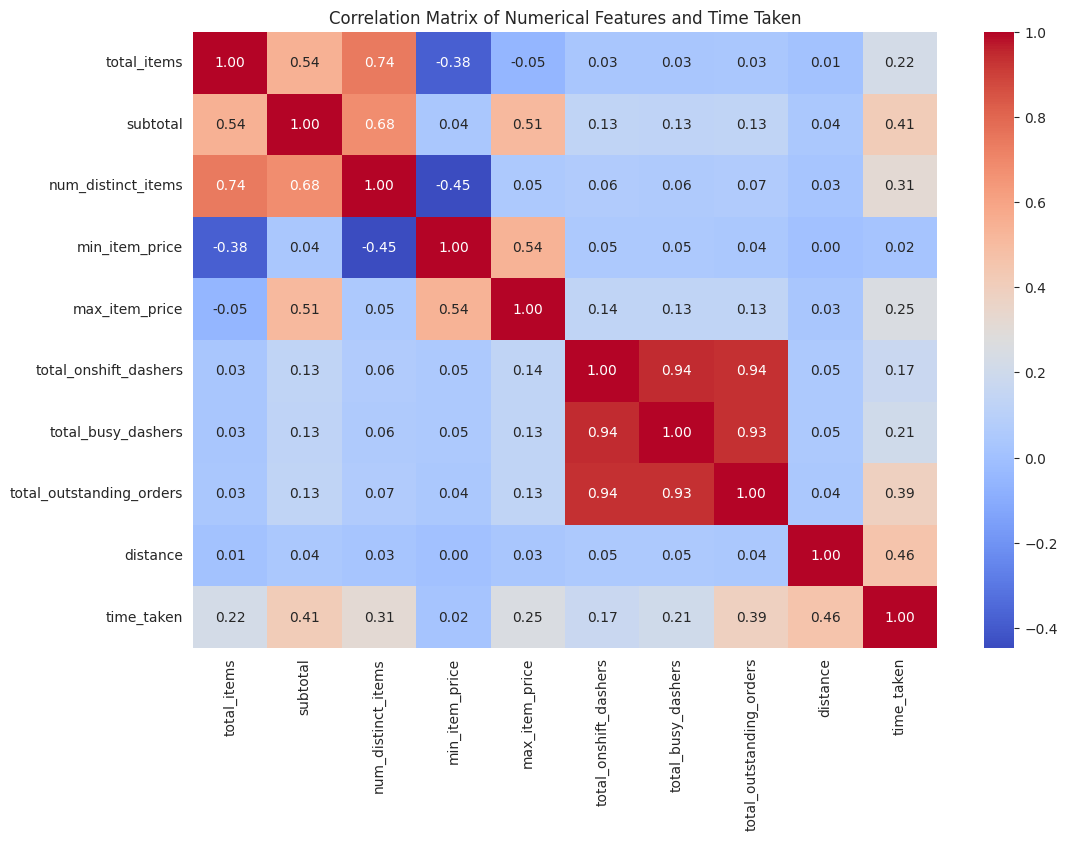

In [ ]:
# Concatenate X_train and y_train to calculate correlations with the target variable
df_num_train = pd.concat([X_train[numerical_cols_train], y_train], axis=1)

# Calculate the correlation matrix
num_train_correlation_matrix = df_num_train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(num_train_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Time Taken')
plt.show()

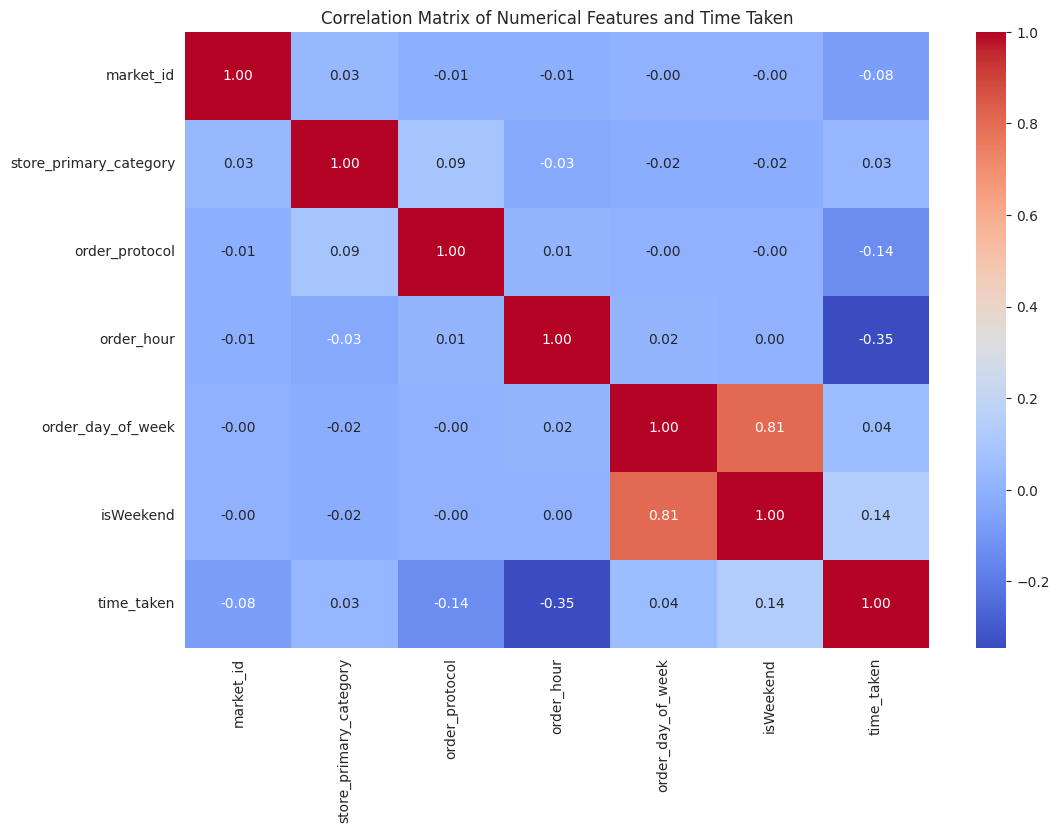

In [ ]:
# Concatenate X_train and y_train to calculate correlations with the target variable
df_cat_train = pd.concat([X_train[categorical_cols_train], y_train], axis=1)

# Calculate the correlation matrix
cat_train_correlation_matrix = df_cat_train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cat_train_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Time Taken')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
# Based on both the heatmaps; min_item_price, order_day_of_week and story_primary_category are weakly correlated columns
weak_corr_cols_train = ['min_item_price', 'order_day_of_week', 'store_primary_category']
X_train = X_train.drop(weak_corr_cols_train, axis=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   order_protocol            140621 non-null  category
 2   total_items               140621 non-null  int64   
 3   subtotal                  140621 non-null  int64   
 4   num_distinct_items        140621 non-null  int64   
 5   max_item_price            140621 non-null  int64   
 6   total_onshift_dashers     140621 non-null  float64 
 7   total_busy_dashers        140621 non-null  float64 
 8   total_outstanding_orders  140621 non-null  float64 
 9   distance                  140621 non-null  float64 
 10  order_hour                140621 non-null  category
 11  isWeekend                 140621 non-null  category
dtypes: category(4), float64(4), int64(4)
memory usage: 14.2 MB


In [ ]:
weak_corr_cols_train

['min_item_price', 'order_day_of_week', 'store_primary_category']

In [ ]:
# Update numerical_cols by removing the weakly correlated columns
numerical_cols = numerical_cols_train.difference(weak_corr_cols_train)

In [ ]:
# Update categorical_cols by removing the weakly correlated columns
categorical_cols = categorical_cols_train.difference(weak_corr_cols_train)

In [ ]:
numerical_cols

Index(['distance', 'max_item_price', 'num_distinct_items', 'subtotal',
       'total_busy_dashers', 'total_items', 'total_onshift_dashers',
       'total_outstanding_orders'],
      dtype='object')

In [ ]:
categorical_cols

Index(['isWeekend', 'market_id', 'order_hour', 'order_protocol'], dtype='object')

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

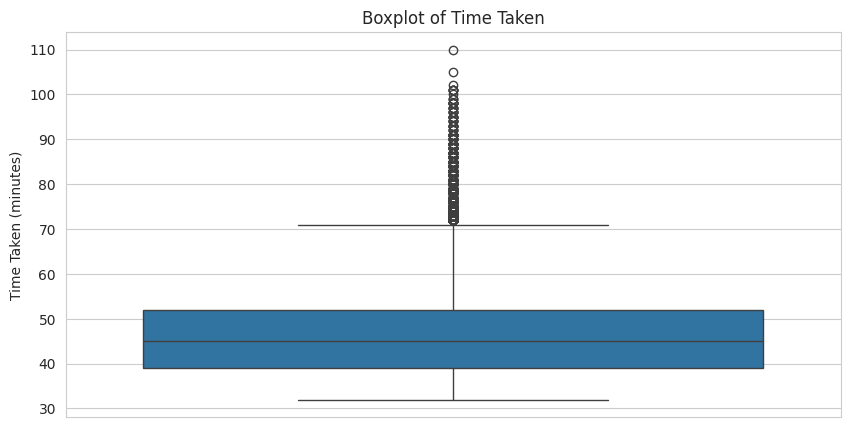

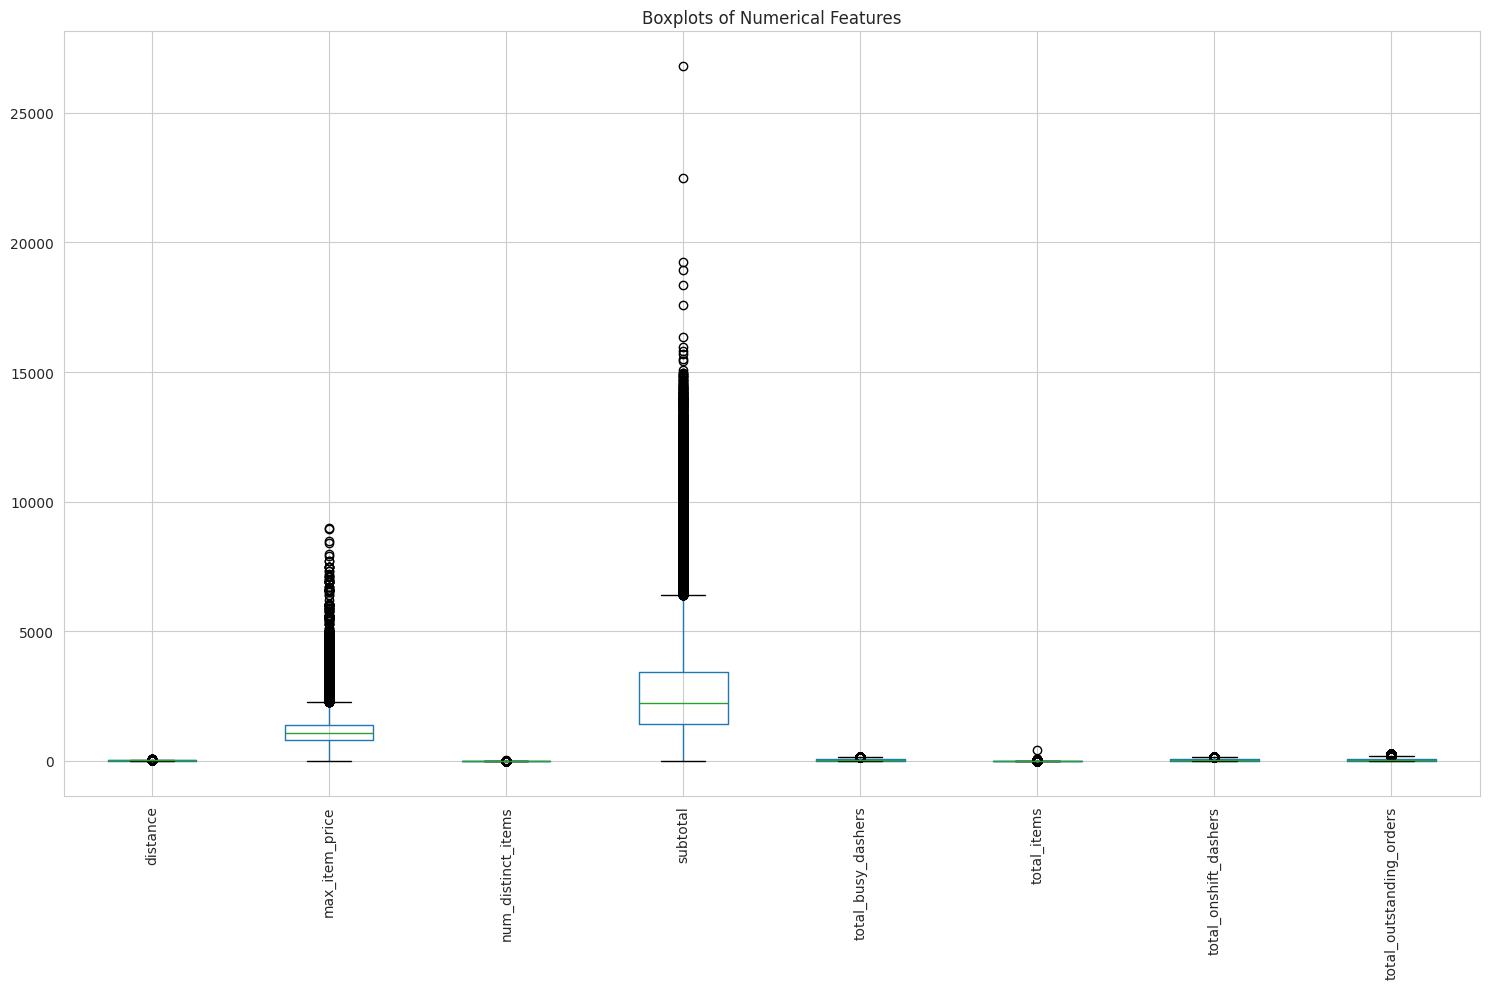

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(10, 5))
sns.boxplot(y=y_train)
plt.title('Boxplot of Time Taken')
plt.ylabel('Time Taken (minutes)')
plt.show()

# Boxplots for other numerical features
X_train[numerical_cols].boxplot(figsize=(15, 10))
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers

for col in numerical_cols:
      Q1 = X_train[col].quantile(0.25)
      Q3 = X_train[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      X_train[col] = X_train[col].clip(lower_bound, upper_bound)

# Handle outliers in y_train without losing Series properties
Q1_y = y_train.quantile(0.25)
Q3_y = y_train.quantile(0.75)
IQR_y = Q3_y - Q1_y
lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y
y_train = y_train.clip(lower_bound_y, upper_bound_y)

print("Outliers handled in X_train and y_train.")

Outliers handled in X_train and y_train.


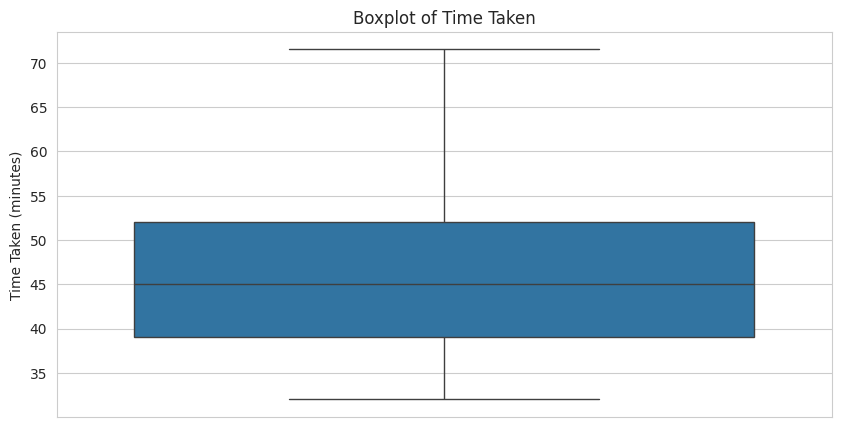

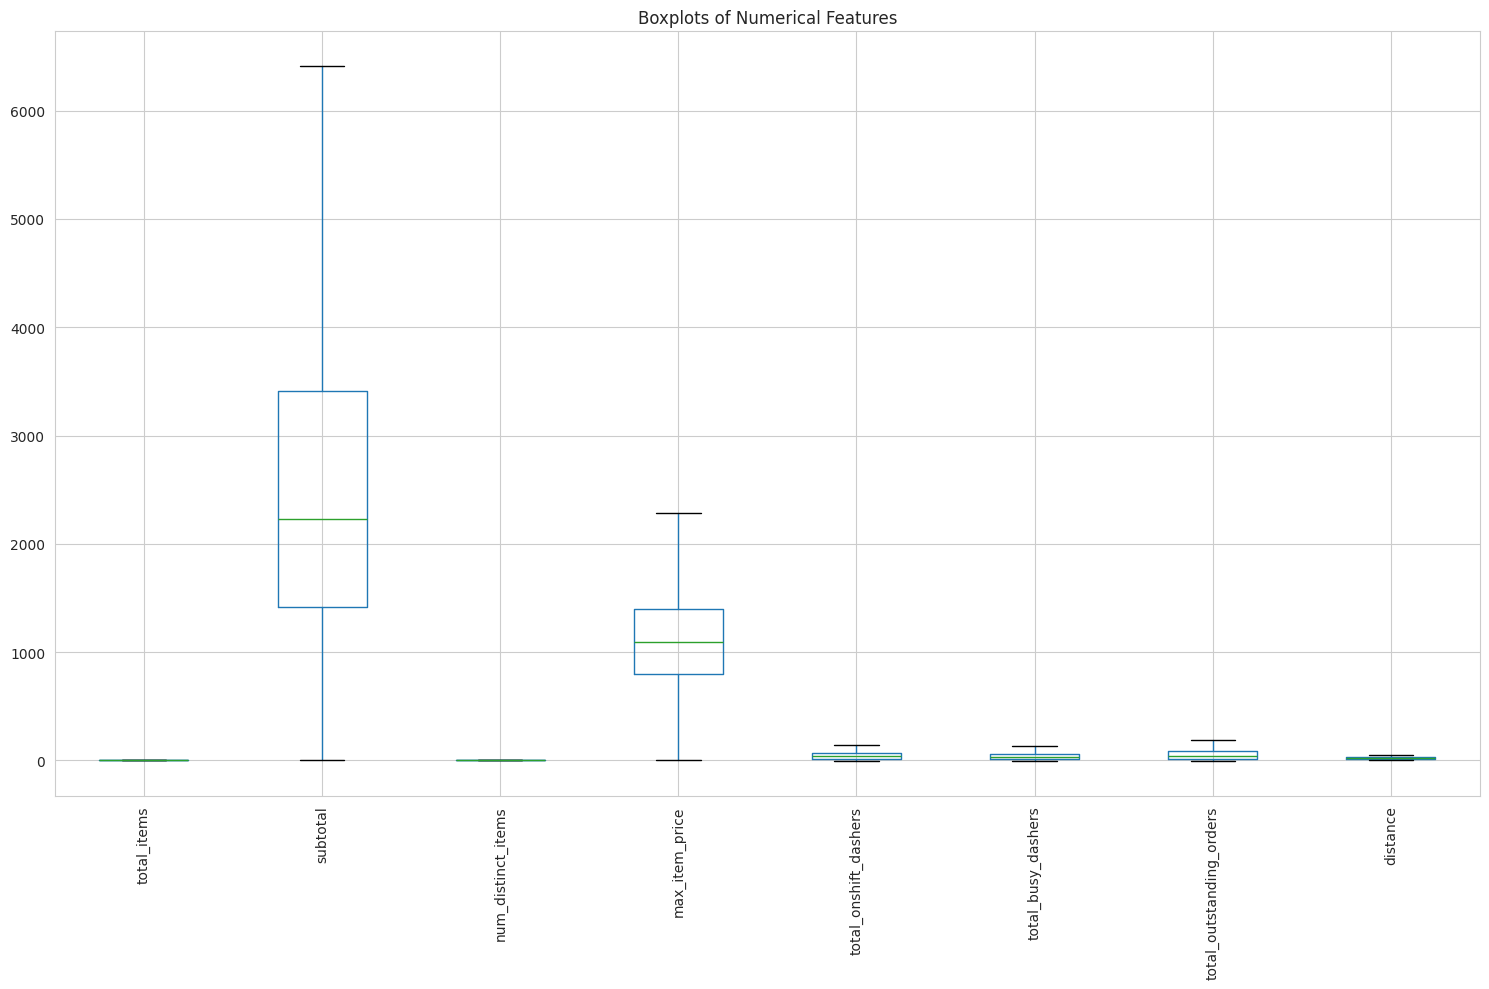

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(10, 5))
sns.boxplot(y=y_train)
plt.title('Boxplot of Time Taken')
plt.ylabel('Time Taken (minutes)')
plt.show()

# Boxplots for other numerical features
X_train[X_train.select_dtypes(include=np.number).columns].boxplot(figsize=(15, 10))
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols_test = X_test.select_dtypes(include=np.number).columns
categorical_cols_test = X_test.select_dtypes(include='category').columns

print("Numerical columns (Test):", numerical_cols_test.tolist())
print("Categorical columns (Test):", categorical_cols_test.tolist())

Numerical columns (Test): ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns (Test): ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

<Figure size 1000x600 with 0 Axes>

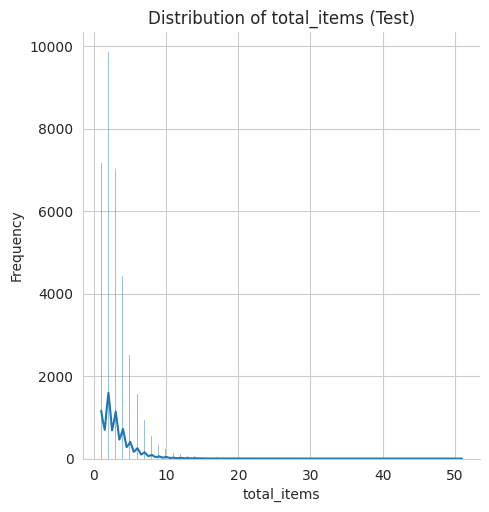

<Figure size 1000x600 with 0 Axes>

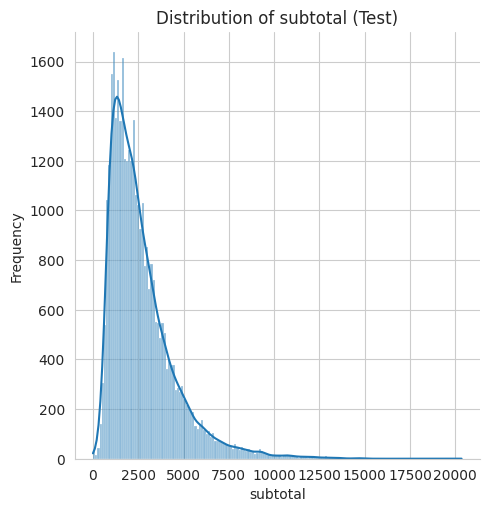

<Figure size 1000x600 with 0 Axes>

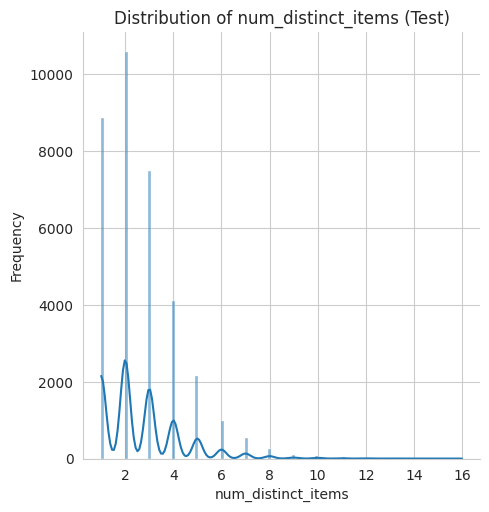

<Figure size 1000x600 with 0 Axes>

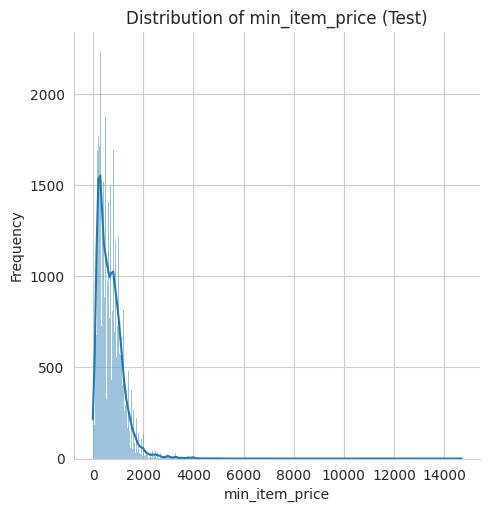

<Figure size 1000x600 with 0 Axes>

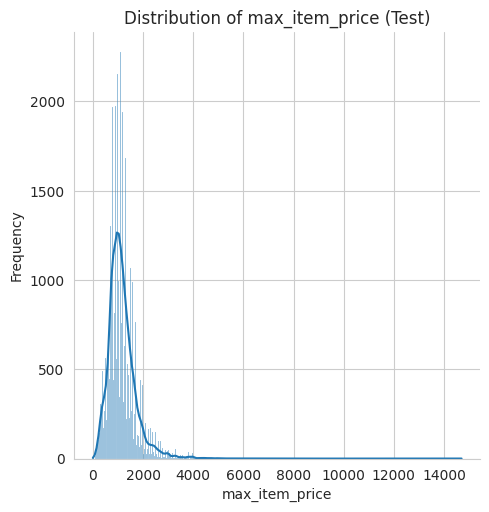

<Figure size 1000x600 with 0 Axes>

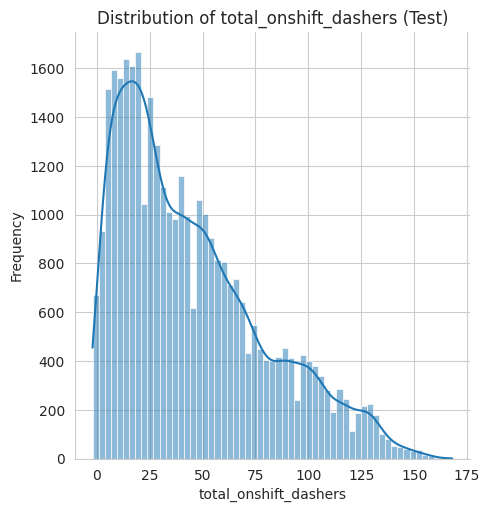

<Figure size 1000x600 with 0 Axes>

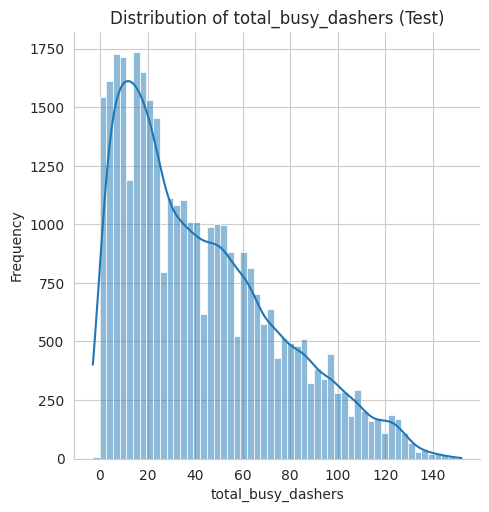

<Figure size 1000x600 with 0 Axes>

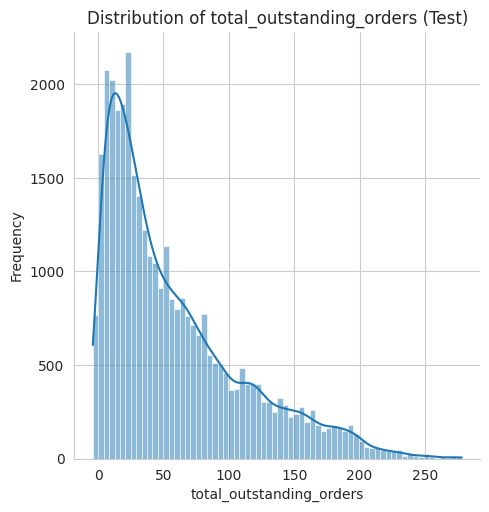

<Figure size 1000x600 with 0 Axes>

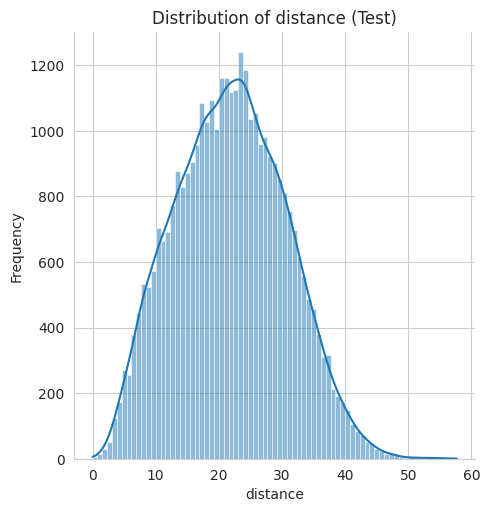

In [ ]:
# Plot distributions for all numerical columns in the test set using sns.histplot
numerical_cols_test = X_test.select_dtypes(include=np.number).columns

for col in numerical_cols_test:
    plt.figure(figsize=(10, 6))
    sns.displot(data=X_test, x=col, kde=True)
    plt.title(f'Distribution of {col} (Test)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

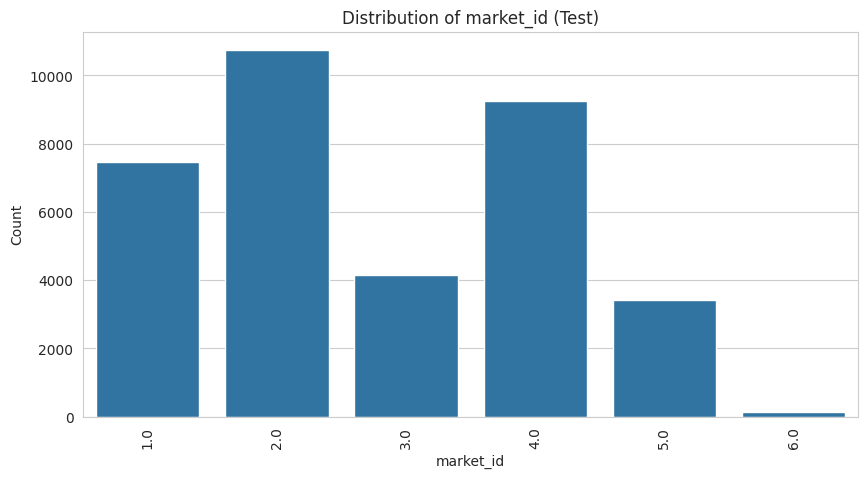

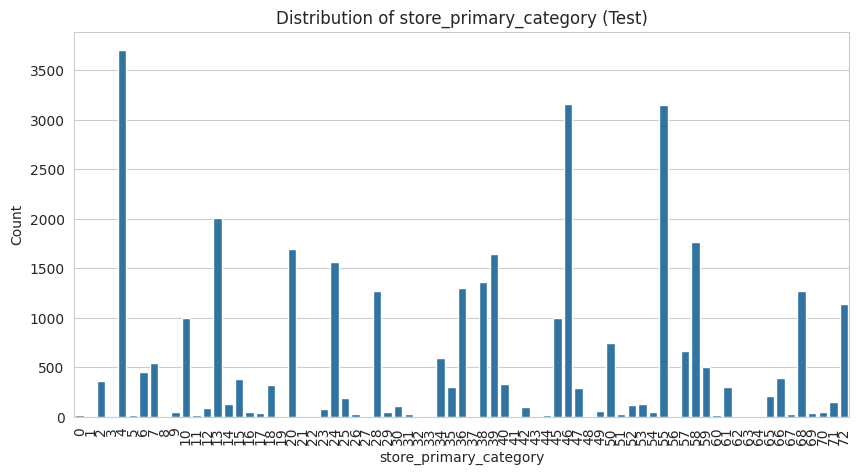

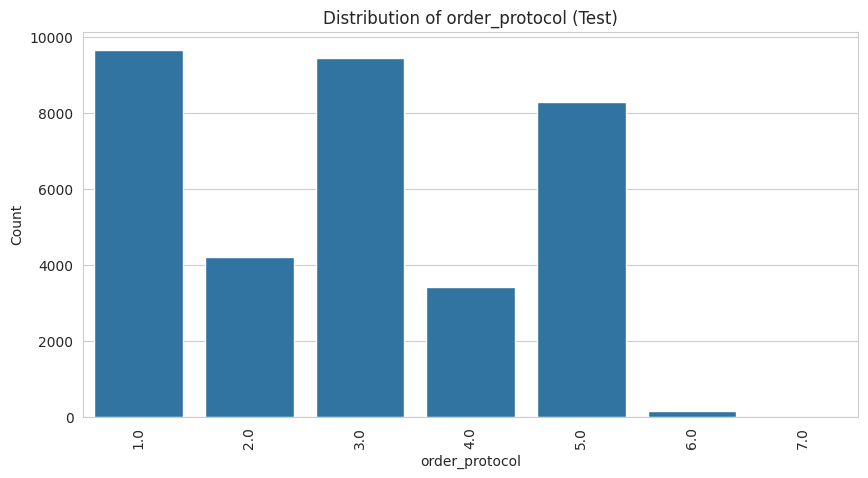

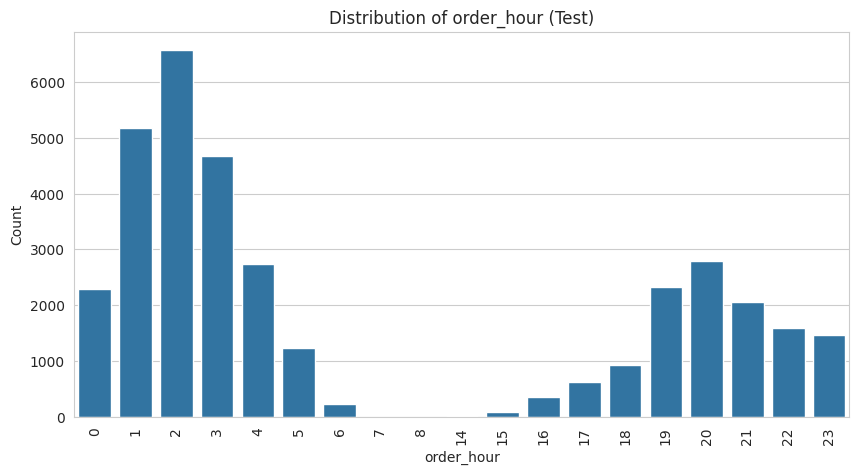

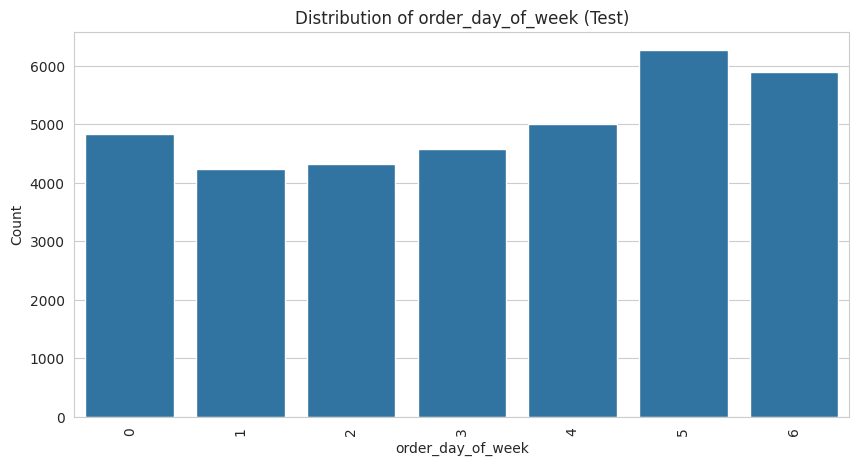

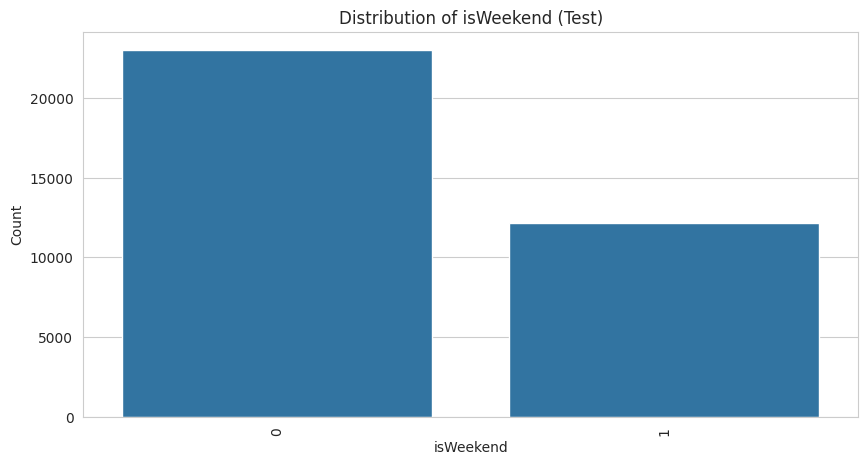

In [ ]:
# Distribution of categorical columns
for col in categorical_cols_test:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=X_test, x=col)
    plt.title(f'Distribution of {col} (Test)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

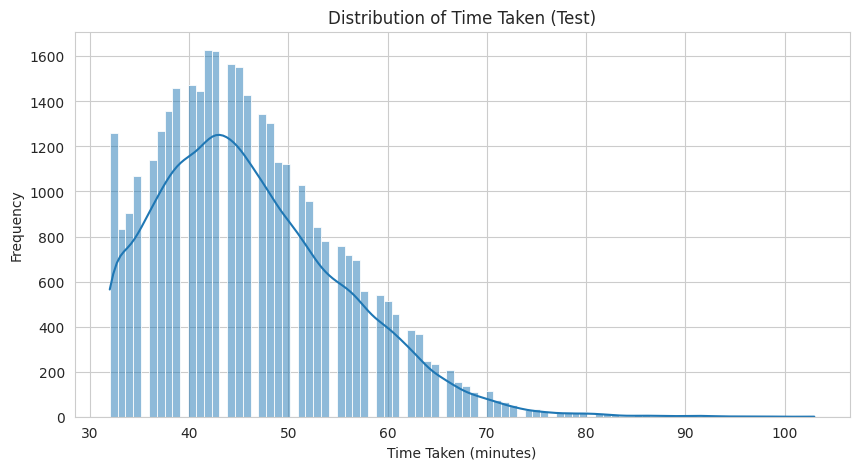

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(y_test, kde=True)
plt.title('Distribution of Time Taken (Test)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

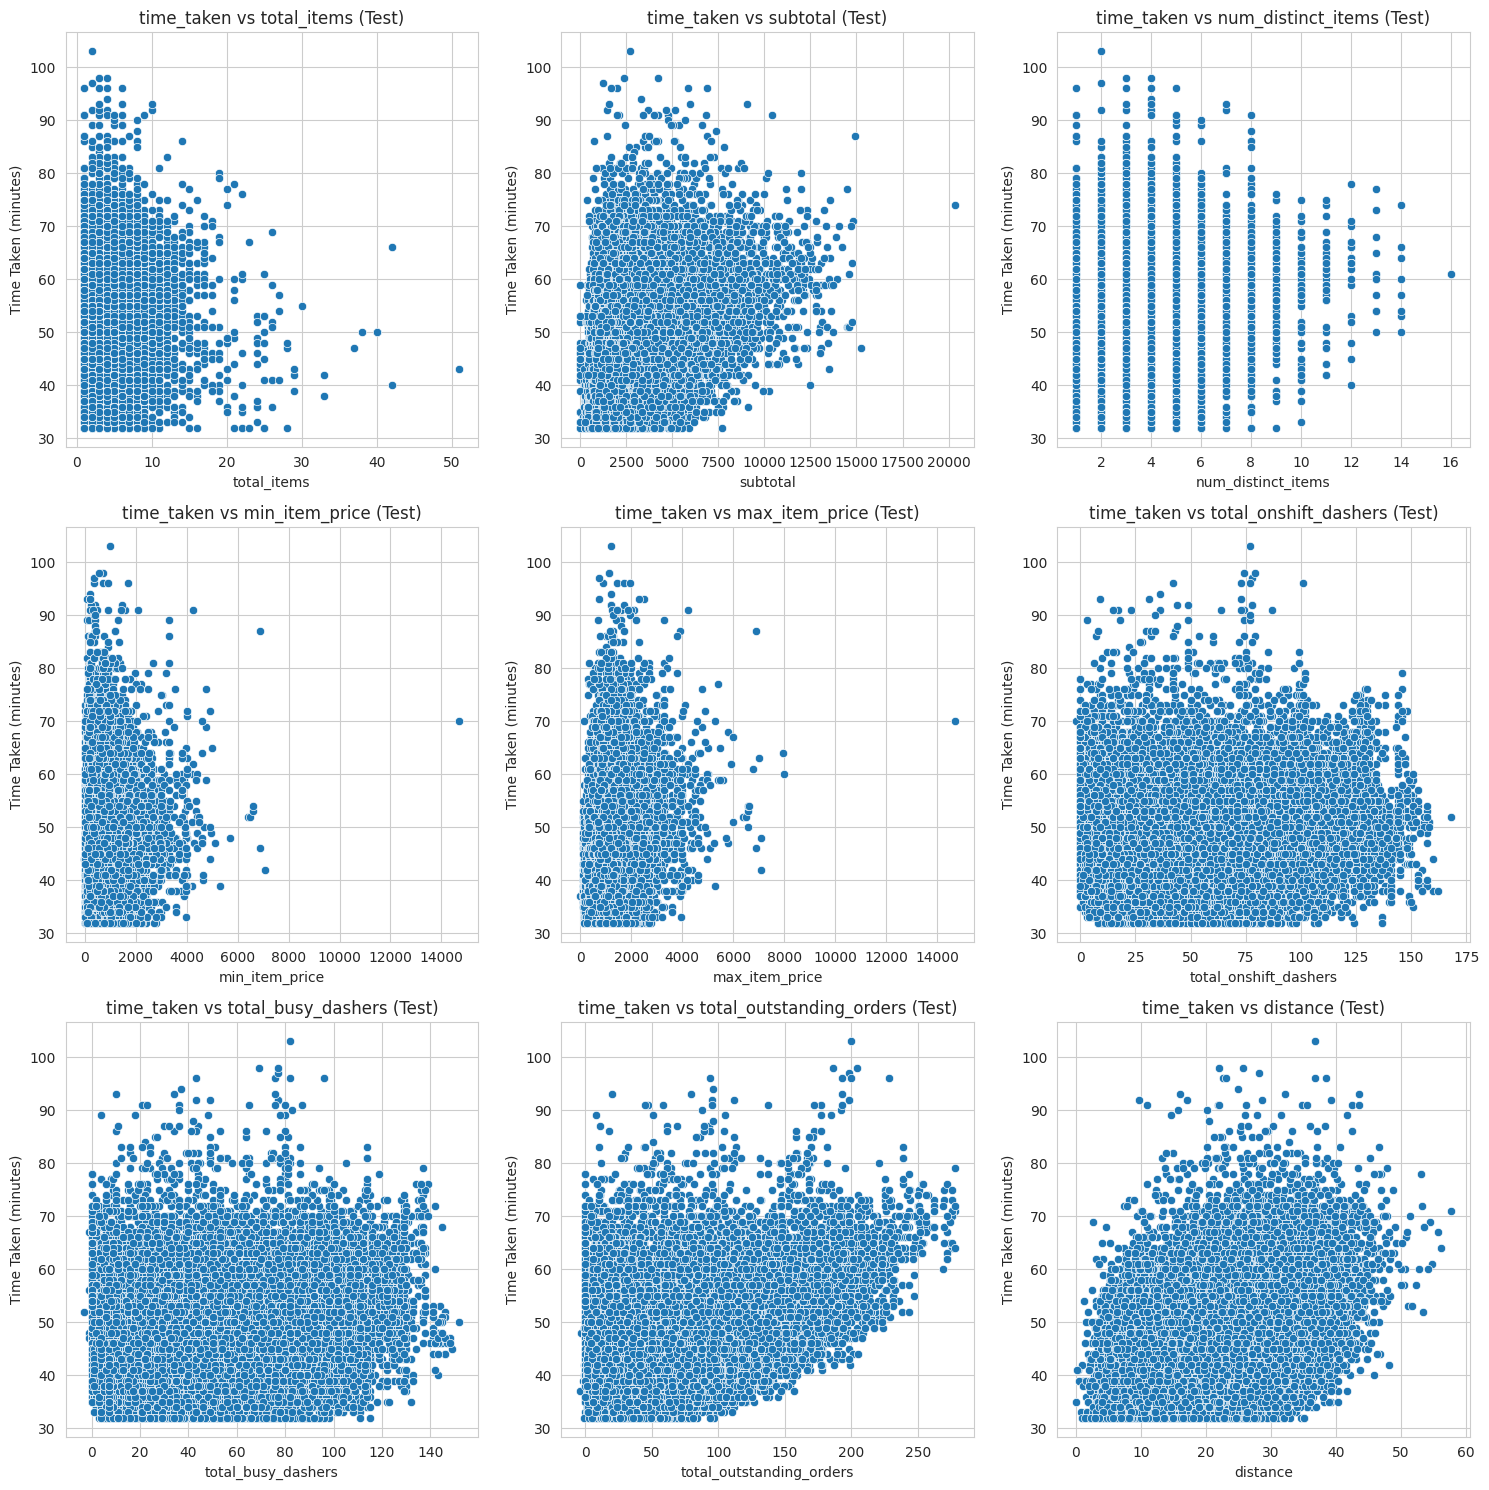

In [ ]:
# Scatter plot to visualise the relationship between time_taken and all numerical features

# Determine the number of plots and calculate grid dimensions
n_plots = len(numerical_cols_test)
n_cols = 3  # Number of columns in the grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, col in enumerate(numerical_cols_test):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=col, y=y_test, data=X_test)
    plt.title(f'time_taken vs {col} (Test)')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

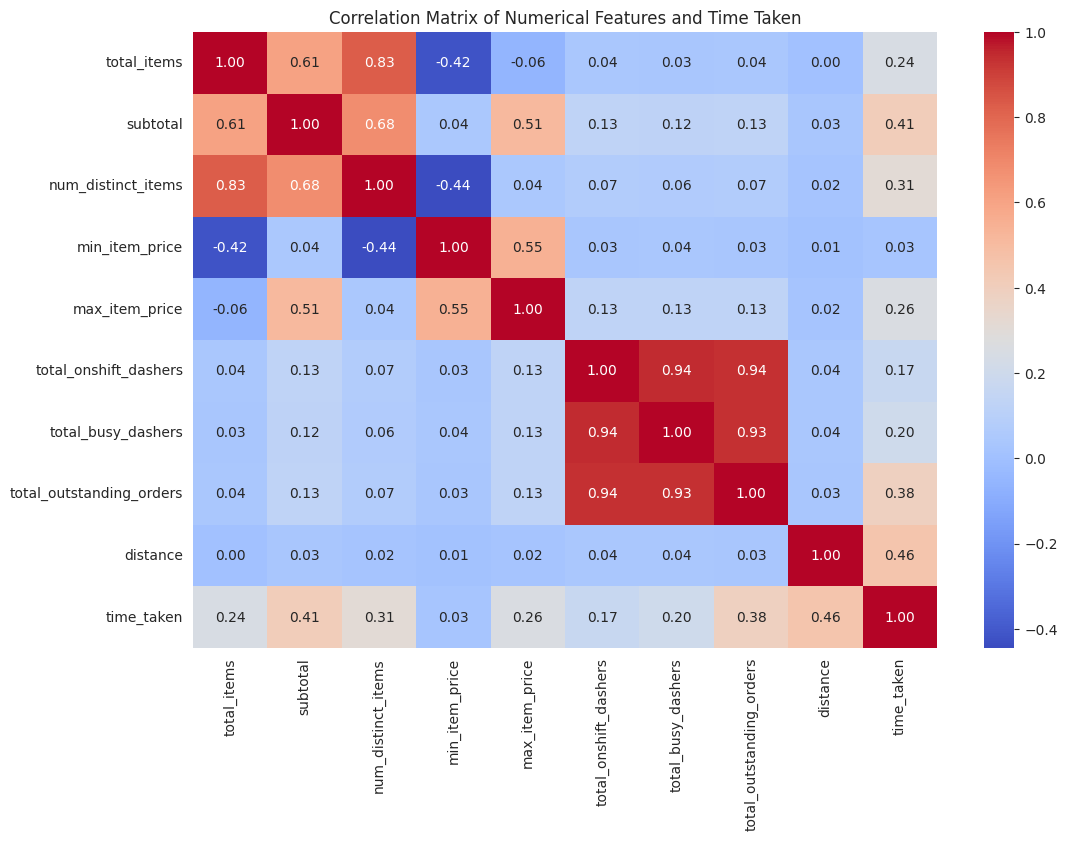

In [ ]:
# Concatenate X_train and y_train to calculate correlations with the target variable
df_num_test = pd.concat([X_test[numerical_cols_test], y_test], axis=1)

# Calculate the correlation matrix
num_test_correlation_matrix = df_num_test.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(num_test_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Time Taken')
plt.show()

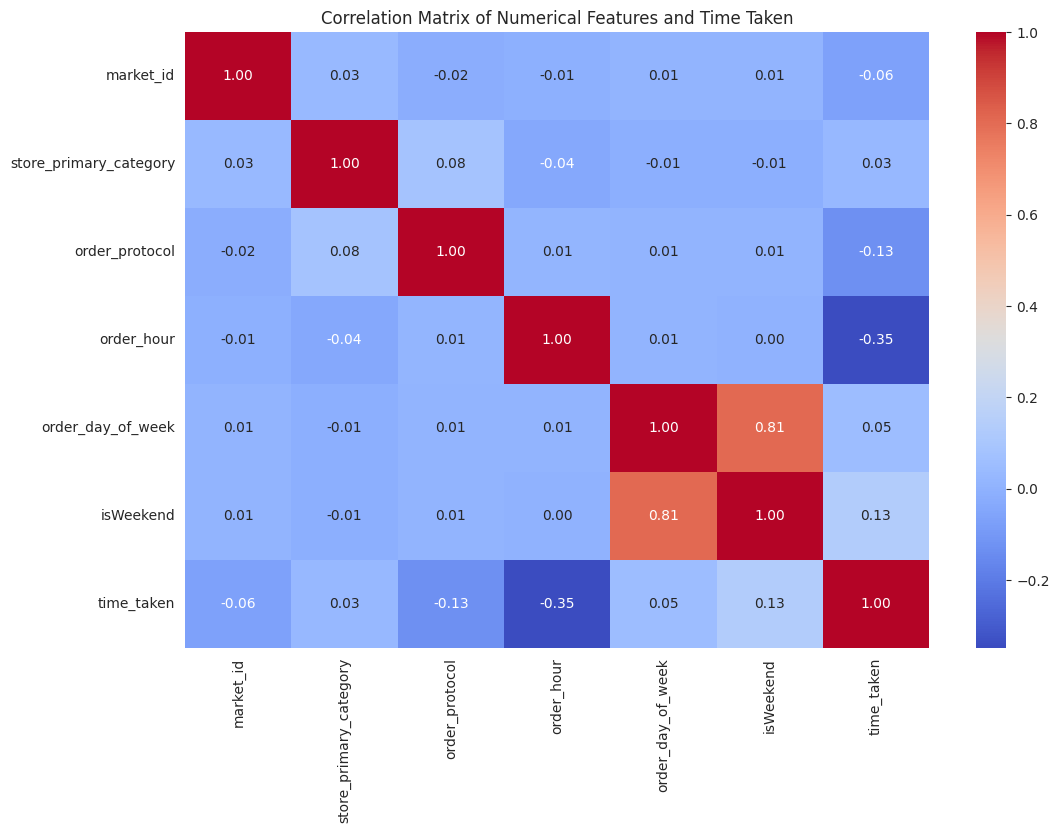

In [ ]:
# Concatenate X_train and y_train to calculate correlations with the target variable
df_cat_test = pd.concat([X_test[categorical_cols_test], y_test], axis=1)

# Calculate the correlation matrix
cat_test_correlation_matrix = df_cat_test.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cat_test_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Time Taken')
plt.show()

In [ ]:
# Drop 3-5 weakly correlated columns from testing dataset
# Based on both heatmaps; min_item_price, order_day_of_week, store_primary_category are weakly correlated columns (same as in training dataset)
weak_corr_cols_test = ['min_item_price', 'order_day_of_week', 'store_primary_category']
X_test = X_test.drop(weak_corr_cols_test, axis=1)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Identify categorical columns in the current X_train DataFrame
categorical_cols = X_train.select_dtypes(include='category').columns

# Perform one-hot encoding on the identified categorical columns
# Keeping all columns for now to allow RFE to select the best features
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True).astype(int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True).astype(int)

display(X_train)
print(f"Shape of X_train after one-hot encoding: {X_train.shape}")

total_items  subtotal  num_distinct_items  max_item_price  \
102712            1       820                   1             745   
94576             1       995                   1             995   
49784             4      2040                   4             895   
37753             2      2376                   2            1399   
91728             1      1430                   1            1320   
...             ...       ...                 ...             ...   
119879            1      1111                   1            1111   
103694            4      2880                   3             795   
131932            2      1799                   2             899   
146867            7      4015                   4             850   
121958            4      4951                   4            1399   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712                     35                  39                        56   
94576                     110                  72                       116   
49784                       6                   3                         7   
37753                      16                  17                        19   
91728                      64                  47                        52   
...                       ...                 ...                       ...   
119879                     31                  31                        34   
103694                     95                  80                       111   
131932                     18                  18                        15   
146867                     26                  24                        28   
121958                     47                  27                        27   

        distance  market_id_2.0  market_id_3.0  ...  order_hour_15  \
102712        30              1              0  ...              0   
94576         31              0              0  ...              0   
49784         18              0              0  ...              0   
37753         33              0              1  ...              0   
91728         31              1              0  ...              0   
...          ...            ...            ...  ...            ...   
119879        37              1              0  ...              0   
103694        27              1              0  ...              0   
131932        21              0              0  ...              0   
146867        23              0              0  ...              0   
121958        18              0              0  ...              0   

        order_hour_16  order_hour_17  order_hour_18  order_hour_19  \
102712              0              0              0              0   
94576               0              0              0              0   
49784               0              0              0              0   
37753               0              0              0              0   
91728               0              0              0              0   
...               ...            ...            ...            ...   
119879              0              0              0              0   
103694              0              0              0              0   
131932              0              0              0              0   
146867              0              0              0              0   
121958              0              0              0              0   

        order_hour_20  order_hour_21  order_hour_22  order_hour_23  \
102712              0              1              0              0   
94576               0              0              0              0   
49784               0              1              0              0   
37753               0              0              0              0   
91728               0              1              0              0   
...               ...            ...            ...            ...   
119879              0              0              0       

Shape of X_train after one-hot encoding: (140621, 38)


In [ ]:
display(X_test)
print(f"Shape of X_test after one-hot encoding: {X_test.shape}")

total_items  subtotal  num_distinct_items  max_item_price  \
50609            4      2596                   4            1099   
49181            3      3180                   2            1300   
4526             1      1199                   1            1199   
131              5      1590                   4             440   
57096            6      3680                   3             750   
...            ...       ...                 ...             ...   
66574            5      1800                   4             825   
33251            4      3336                   3            1589   
76943            3      1900                   3            1300   
43932            2      2138                   2            1537   
49931           11      1573                   5             329   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
50609                     55                  52                        66   
49181                    101                  98                       192   
4526                       7                   6                         6   
131                        3                   4                         4   
57096                      9                   1                         1   
...                      ...                 ...                       ...   
66574                     95                  92                       142   
33251                     34                  29                        33   
76943                     36                  34                        26   
43932                     70                  63                        85   
49931                     21                  22                        31   

       distance  market_id_2.0  market_id_3.0  ...  order_hour_15  \
50609        28              0              0  ...              0   
49181        23              0              0  ...              0   
4526         14              0              0  ...              0   
131          25              0              0  ...              0   
57096        16              0              1  ...              0   
...         ...            ...            ...  ...            ...   
66574        30              0              0  ...              0   
33251        11              0              1  ...              0   
76943         8              0              0  ...              0   
43932        11              1              0  ...              0   
49931        11              0              0  ...              0   

       order_hour_16  order_hour_17  order_hour_18  order_hour_19  \
50609              0              0              0              0   
49181              0              0              0              0   
4526               0              0              0              0   
131                0              0              0              0   
57096              0              0              0              1   
...              ...            ...            ...            ...   
66574              0              0              0              0   
33251              0              0              0              0   
76943              0              0              0              0   
43932              0              0              0              0   
49931              0              0              0              0   

       order_hour_20  order_hour_21  order_hour_22  order_hour_23  isWeekend_1  
50609              0              0              0              0            0  
49181              0              0              0              0            0  
4526               0              0              0              0            0  
131                0              0              1              0            0  
57096              0              0              0              0            1  
...              ...            ...            ...            ...          ...  
66574              0        

Shape of X_test after one-hot encoding: (35156, 38)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   total_items               140621 non-null  int64
 1   subtotal                  140621 non-null  int64
 2   num_distinct_items        140621 non-null  int64
 3   max_item_price            140621 non-null  int64
 4   total_onshift_dashers     140621 non-null  int64
 5   total_busy_dashers        140621 non-null  int64
 6   total_outstanding_orders  140621 non-null  int64
 7   distance                  140621 non-null  int64
 8   market_id_2.0             140621 non-null  int64
 9   market_id_3.0             140621 non-null  int64
 10  market_id_4.0             140621 non-null  int64
 11  market_id_5.0             140621 non-null  int64
 12  market_id_6.0             140621 non-null  int64
 13  order_protocol_2.0        140621 non-null  int64
 14  order_protocol_3.0  

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 50609 to 49931
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_items               35156 non-null  int64
 1   subtotal                  35156 non-null  int64
 2   num_distinct_items        35156 non-null  int64
 3   max_item_price            35156 non-null  int64
 4   total_onshift_dashers     35156 non-null  int64
 5   total_busy_dashers        35156 non-null  int64
 6   total_outstanding_orders  35156 non-null  int64
 7   distance                  35156 non-null  int64
 8   market_id_2.0             35156 non-null  int64
 9   market_id_3.0             35156 non-null  int64
 10  market_id_4.0             35156 non-null  int64
 11  market_id_5.0             35156 non-null  int64
 12  market_id_6.0             35156 non-null  int64
 13  order_protocol_2.0        35156 non-null  int64
 14  order_protocol_3.0        35156 non-nul

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to all selected columns
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled numpy arrays back to pandas DataFrames, preserving column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

display(X_train.head())
print(f"Number of columns in X_train after selection and scaling: {X_train.shape[1]}")

total_items  subtotal  num_distinct_items  max_item_price  \
102712     0.000000  0.127925            0.000000        0.325470   
94576      0.000000  0.155226            0.000000        0.434688   
49784      0.500000  0.318253            1.000000        0.391000   
37753      0.166667  0.370671            0.333333        0.611184   
91728      0.000000  0.223089            0.000000        0.576671   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712               0.272727            0.314286                  0.321244   
94576                0.797203            0.550000                  0.632124   
49784                0.069930            0.057143                  0.067358   
37753                0.139860            0.157143                  0.129534   
91728                0.475524            0.371429                  0.300518   

        distance  market_id_2.0  market_id_3.0  ...  order_hour_15  \
102712  0.638298            1.0            0.0  ...            0.0   
94576   0.659574            0.0            0.0  ...            0.0   
49784   0.382979            0.0            0.0  ...            0.0   
37753   0.702128            0.0            1.0  ...            0.0   
91728   0.659574            1.0            0.0  ...            0.0   

        order_hour_16  order_hour_17  order_hour_18  order_hour_19  \
102712            0.0            0.0            0.0            0.0   
94576             0.0            0.0            0.0            0.0   
49784             0.0            0.0            0.0            0.0   
37753             0.0            0.0            0.0            0.0   
91728             0.0            0.0            0.0            0.0   

        order_hour_20  order_hour_21  order_hour_22  order_hour_23  \
102712            0.0            1.0            0.0            0.0   
94576             0.0            0.0            0.0            0.0   
49784             0.0            1.0            0.0            0.0   
37753             0.0            0.0            0.0            0.0   
91728             0.0            1.0            0.0            0.0   

        isWeekend_1  
102712          0.0  
94576           0.0  
49784           0.0  
37753           0.0  
91728           0.0  

[5 rows x 38 columns]

Number of columns in X_train after selection and scaling: 38


In [ ]:
display(X_train.describe())

total_items       subtotal  num_distinct_items  max_item_price  \
count  140621.000000  140621.000000       140621.000000   140621.000000   
mean        0.336228       0.407057            0.479210        0.495622   
std         0.292608       0.239211            0.368269        0.202926   
min         0.000000       0.000000            0.000000        0.000000   
25%         0.166667       0.221217            0.333333        0.349061   
50%         0.333333       0.347114            0.333333        0.478375   
75%         0.500000       0.532761            0.666667        0.609436   
max         1.000000       1.000000            1.000000        1.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean                0.341768            0.334755                  0.329373   
std                 0.240651            0.229675                  0.263277   
min                 0.000000            0.000000                  0.000000   
25%                 0.146853            0.142857                  0.119171   
50%                 0.286713            0.285714                  0.243523   
75%                 0.489510            0.485714                  0.471503   
max                 1.000000            1.000000                  1.000000   

            distance  market_id_2.0  market_id_3.0  ...  order_hour_15  \
count  140621.000000  140621.000000  140621.000000  ...  140621.000000   
mean        0.454335       0.303810       0.120423  ...       0.002923   
std         0.185885       0.459903       0.325457  ...       0.053984   
min         0.000000       0.000000       0.000000  ...       0.000000   
25%         0.319149       0.000000       0.000000  ...       0.000000   
50%         0.446809       0.000000       0.000000  ...       0.000000   
75%         0.595745       1.000000       0.000000  ...       0.000000   
max         1.000000       1.000000       1.000000  ...       1.000000   

       order_hour_16  order_hour_17  order_hour_18  order_hour_19  \
count  140621.000000  140621.000000  140621.000000  140621.000000   
mean        0.011186       0.017273       0.025494       0.069371   
std         0.105172       0.130289       0.157621       0.254085   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       order_hour_20  order_hour_21  order_hour_22  order_hour_23  \
count  140621.000000  140621.000000  140621.000000  140621.000000   
mean        0.078886       0.058078       0.044716       0.041672   
std         0.269561       0.233892       0.206680       0.199840   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        isWeekend_1  
count  140621.00000  
mean        0.34546  
std         0.47552  
min         0.00000  
25%         0.00000  
50%         0.00000  
75%         1.00000  
max         1.00000  

[8 rows x 38 columns]

In [ ]:
display(X_test.describe())

total_items      subtotal  num_distinct_items  max_item_price  \
count  35156.000000  35156.000000        35156.000000    35156.000000   
mean       0.365092      0.419667            0.556482        0.507208   
std        0.408376      0.283857            0.541440        0.246986   
min        0.000000      0.000000            0.000000        0.000000   
25%        0.166667      0.218409            0.000000        0.349061   
50%        0.333333      0.346334            0.333333        0.478375   
75%        0.500000      0.530421            0.666667        0.609436   
max        8.333333      3.174727            5.000000        6.422018   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count           35156.000000        35156.000000              35156.000000   
mean                0.341829            0.334191                  0.332487   
std                 0.240798            0.228940                  0.272337   
min                 0.013986            0.014286                  0.010363   
25%                 0.146853            0.142857                  0.119171   
50%                 0.286713            0.285714                  0.243523   
75%                 0.482517            0.478571                  0.471503   
max                 1.202797            1.121429                  1.471503   

           distance  market_id_2.0  market_id_3.0  ...  order_hour_15  \
count  35156.000000   35156.000000   35156.000000  ...   35156.000000   
mean       0.454765       0.305695       0.117789  ...       0.002588   
std        0.186099       0.460708       0.322363  ...       0.050812   
min        0.000000       0.000000       0.000000  ...       0.000000   
25%        0.319149       0.000000       0.000000  ...       0.000000   
50%        0.446809       0.000000       0.000000  ...       0.000000   
75%        0.595745       1.000000       0.000000  ...       0.000000   
max        1.212766       1.000000       1.000000  ...       1.000000   

       order_hour_16  order_hour_17  order_hour_18  order_hour_19  \
count   35156.000000   35156.000000   35156.000000   35156.000000   
mean        0.010325       0.017892       0.026425       0.066219   
std         0.101089       0.132560       0.160398       0.248668   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       order_hour_20  order_hour_21  order_hour_22  order_hour_23  \
count   35156.000000   35156.000000   35156.000000   35156.000000   
mean        0.079361       0.058368       0.045142       0.041927   
std         0.270305       0.234442       0.207618       0.200426   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        isWeekend_1  
count  35156.000000  
mean       0.346228  
std        0.475774  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 38 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model using statsmodels
# Add a constant to the training features
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)

In [ ]:
# Train the model using the training data
lr_model = lr.fit()

In [ ]:
# Display the model summary
print("\nModel Summary:")
print(lr_model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 3.009e+04
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:53:42   Log-Likelihood:            -3.5489e+05
No. Observations:              140621   AIC:                         7.099e+05
Df Residuals:                  140582   BIC:                         7.102e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const   

In [ ]:
lr_model.params

const                       37.375877
total_items                  1.466953
subtotal                     9.407730
num_distinct_items           0.463358
max_item_price               1.382201
total_onshift_dashers      -49.799186
total_busy_dashers         -17.058253
total_outstanding_orders    67.979956
distance                    22.525442
market_id_2.0               -4.843635
market_id_3.0               -4.054339
market_id_4.0               -4.161970
market_id_5.0               -3.339441
market_id_6.0               -2.815591
order_protocol_2.0          -0.725810
order_protocol_3.0          -1.432535
order_protocol_4.0          -1.850022
order_protocol_5.0          -2.776395
order_protocol_6.0          -1.383617
order_protocol_7.0          -1.333000
order_hour_1                -0.378621
order_hour_2                -0.852806
order_hour_3                -1.090344
order_hour_4                -2.074100
order_hour_5                -2.012528
order_hour_6                -1.839619
order_hour_7                -2.349997
order_hour_8                -0.631785
order_hour_14               -2.042875
order_hour_15               -2.235352
order_hour_16               -2.715280
order_hour_17               -3.168977
order_hour_18               -3.881605
order_hour_19               -4.639887
order_hour_20               -4.909970
order_hour_21               -4.684456
order_hour_22               -4.633922
order_hour_23               -4.548728
isWeekend_1                  1.482118
dtype: float64

In [ ]:
y_train_pred = lr_model.predict(X_train_sm)

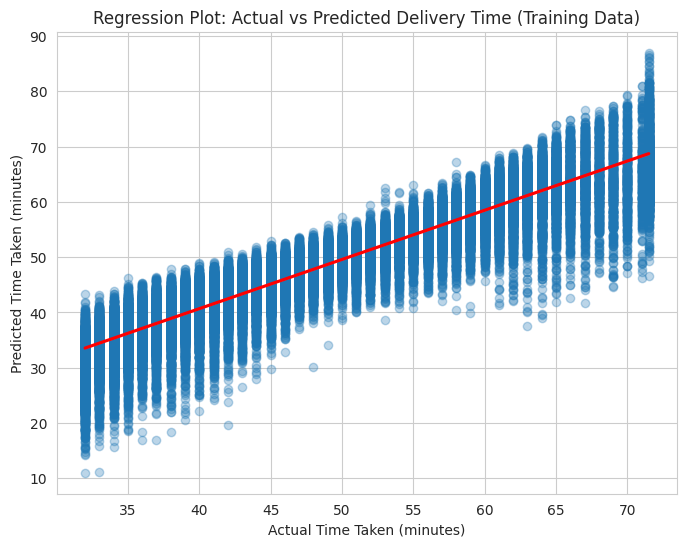

In [ ]:
# Plotting the regression plot for the training data using seaborn.regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_train_pred, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}) # Use regplot for scatter and fitted line
plt.title('Regression Plot: Actual vs Predicted Delivery Time (Training Data)')
plt.xlabel('Actual Time Taken (minutes)')
plt.ylabel('Predicted Time Taken (minutes)')
plt.show()

In [ ]:
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"R-Squared Error (R2) : {r2_score(y_train, y_train_pred):.2f}")

Root Mean Squared Error (RMSE): 3.02
R-Squared Error (R2) : 0.89


**Explanation for the appearance of the regression plot:**

The regression plot shows the actual delivery times on the x-axis and the predicted delivery times on the y-axis. It appears as dense lines or areas instead of individual scattered dots due to the very large number of data points in the training set (over 140,000). When a large number of points are plotted, especially when they are clustered or follow a strong linear trend, they tend to overlap significantly, creating the visual effect of solid lines.

The `scatter_kws={'alpha': 0.3}` argument in `seaborn.regplot` adds transparency to the points, which helps to indicate areas of higher data density. However, with such a substantial dataset, even with transparency, the overlapping points will form what looks like lines.

This plot is intended to show the overall relationship between actual and predicted values and how closely they follow the ideal regression line (where actual equals predicted). It is different from a residual plot, which specifically visualizes the difference between actual and predicted values (the errors or residuals).

In [ ]:
# Make predictions using the statsmodels results
# Add a constant to the test features
X_test_sm = sm.add_constant(X_test)
y_pred = lr_model.predict(X_test_sm)

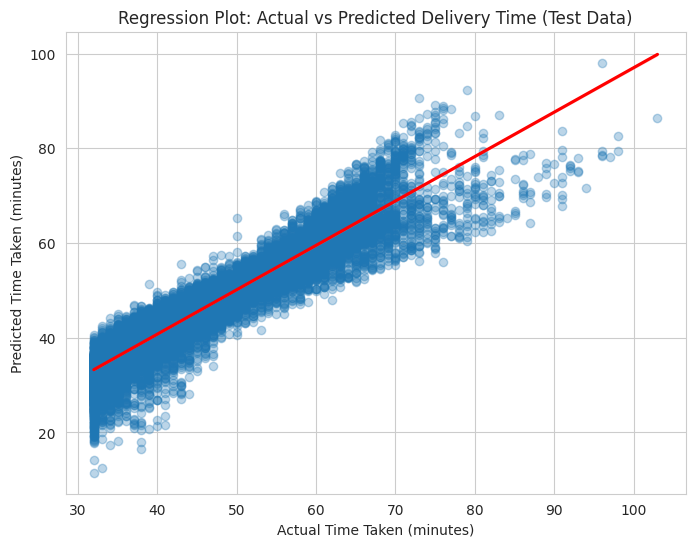

In [ ]:
# Plotting the regression plot for the test data using seaborn.regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}) # Use regplot for scatter and fitted line
plt.title('Regression Plot: Actual vs Predicted Delivery Time (Test Data)')
plt.xlabel('Actual Time Taken (minutes)')
plt.ylabel('Predicted Time Taken (minutes)')
plt.show()

In [ ]:
# Find results for evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Root Mean Squared Error (RMSE): 3.05
R-squared (R2): 0.89


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.


RFE Iteration Results:


n_features      rmse        r2  \
36          37  3.044780  0.894082   
35          36  3.044782  0.894082   
37          38  3.047378  0.893902   
33          34  3.053352  0.893485   
34          35  3.053944  0.893444   
32          33  3.061219  0.892936   
31          32  3.068608  0.892418   
30          31  3.100062  0.890201   
29          30  3.101235  0.890118   
28          29  3.101267  0.890116   
27          28  3.116455  0.889037   
26          27  3.120614  0.888741   
25          26  3.139410  0.887396   
24          25  3.151076  0.886558   
23          24  3.151138  0.886553   
22          23  3.151159  0.886552   
21          22  3.152971  0.886421   
20          21  3.195131  0.883364   
19          20  3.201828  0.882874   
17          18  3.203972  0.882717   
16          17  3.206700  0.882517   
18          19  3.215474  0.881874   
15          16  3.305250  0.875185   
14          15  3.340255  0.872528   
13          14  3.345334  0.872140   
12          13  3.442353  0.864616   
11          12  3.549593  0.856049   
10          11  3.664798  0.846554   
9           10  3.768285  0.837765   
8            9  3.861863  0.829608   
7            8  3.944416  0.822245   
6            7  4.025729  0.814841   
5            6  4.116597  0.806388   
4            5  4.192592  0.799173   
3            4  5.376341  0.669760   
2            3  5.563701  0.646341   
1            2  7.000889  0.440032   
0            1  8.635108  0.148093   

                                    selected_features  
36  [total_items, subtotal, num_distinct_items, ma...  
35  [total_items, subtotal, num_distinct_items, ma...  
37  [total_items, subtotal, num_distinct_items, ma...  
33  [total_items, subtotal, max_item_price, total_...  
34  [total_items, subtotal, max_item_price, total_...  
32  [total_items, subtotal, max_item_price, total_...  
31  [total_items, subtotal, max_item_price, total_...  
30  [total_items, subtotal, max_item_price, total_...  
29  [total_items, subtotal, max_item_price, total_...  
28  [total_items, subtotal, max_item_price, total_...  
27  [total_items, subtotal, max_item_price, total_...  
26  [total_items, subtotal, max_item_price, total_...  
25  [total_items, subtotal, max_item_price, total_...  
24  [total_items, subtotal, max_item_price, total_...  
23  [total_items, subtotal, max_item_price, total_...  
22  [total_items, subtotal, max_item_price, total_...  
21  [total_items, subtotal, max_item_price, total_...  
20  [total_items, subtotal, max_item_price, total_...  
19  [total_items, subtotal, max_item_price, total_...  
17  [subtotal, max_item_price, total_onshift_dashe...  
16  [subtotal, total_onshift_dashers, total_busy_d...  
18  [total_items, subtotal, max_item_price, total_...  
15  [subtotal, total_onshift_dashers, total_busy_d...  
14  [subtotal, total_onshift_dashers, total_busy_d...  
13  [subtotal, total_onshift_dashers, total_busy_d...  
12  [subtotal, total_onshift_dashers, total_busy_d...  
11  [subtotal, total_onshift_dashers, total_busy_d...  
10  [subtotal, total_onshift_dashers, total_busy_d...  
9   [subtotal, total_onshift_dashers, total_busy_d...  
8   [subtotal, total_onshift_dashers, total_busy_d...  
7   [subtotal, total_onshift_dashers, total_busy_d...  
6   [subtotal, total_onshift_dashers, total_busy_d...  
5   [subtotal, total_onshift_dashers, total_busy_d...  
4   [subtotal, total_onshift_dashers, total_busy_d...  
3   [total_onshift_dashers, total_busy_dashers, to...  
2   [total_onshift_dashers, total_outstanding_orde...  
1   [total_onshift_dashers, total_outstanding_orders]  
0                          [total_outstanding_orders]

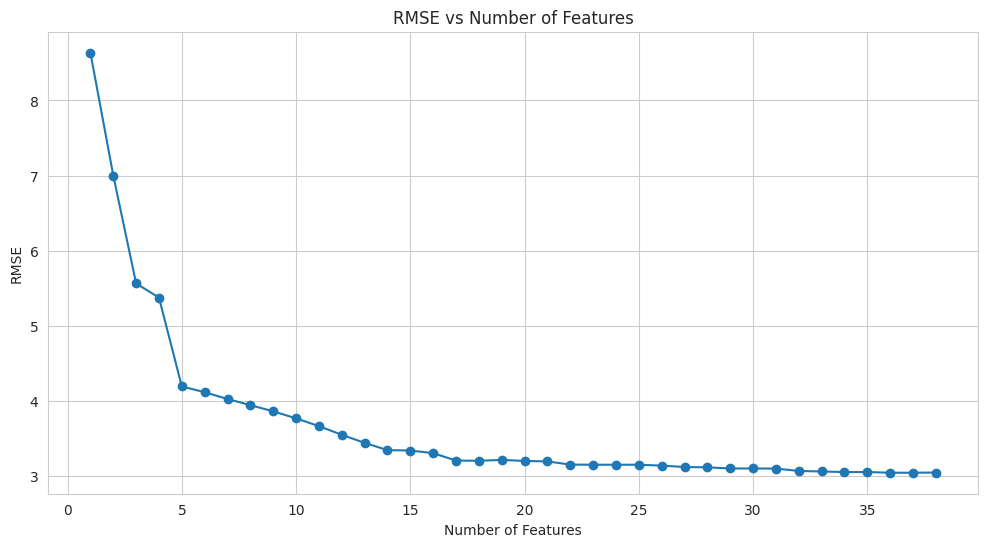

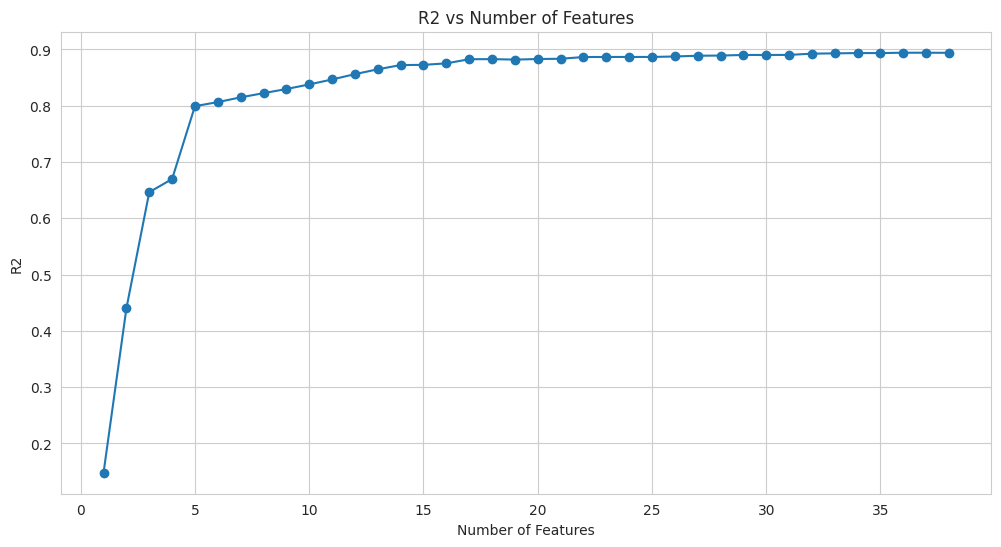

In [ ]:
# Create a Linear Regression model to use with RFE
lm = LinearRegression()

# Store results for analysis
results = []

# Iterate through different numbers of features to select (from all features down to 1)
# X_train.shape[1] is the total number of features after one-hot encoding
for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(lm, n_features_to_select=n_features)

    # Fit RFE to the training data
    rfe = rfe.fit(X_train, y_train.ravel())

    # Get the list of selected features
    selected_rfe_features = X_train.columns[rfe.support_]

    # Build a new OLS model with the selected features
    X_train_rfe = X_train[selected_rfe_features]
    X_train_rfe_sm = sm.add_constant(X_train_rfe)

    lr_model_rfe = sm.OLS(y_train, X_train_rfe_sm).fit()

    # Make predictions on the test set using the RFE selected features
    X_test_rfe = X_test[selected_rfe_features]
    X_test_rfe_sm = sm.add_constant(X_test_rfe)
    y_pred_rfe = lr_model_rfe.predict(X_test_rfe_sm)

    # Evaluate the model with RFE selected features
    rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
    r2_rfe = r2_score(y_test, y_pred_rfe)

    # Store the results
    results.append({'n_features': n_features, 'rmse': rmse_rfe, 'r2': r2_rfe, 'selected_features': selected_rfe_features.tolist()})

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results
print("\nRFE Iteration Results:")
display(results_df.sort_values(by='rmse'))

# Optional: Plot RMSE and R2 vs number of features to visualize the trade-off
plt.figure(figsize=(12, 6))
plt.plot(results_df['n_features'], results_df['rmse'], marker='o')
plt.title('RMSE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(results_df['n_features'], results_df['r2'], marker='o')
plt.title('R2 vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R2')
plt.show()

Based on the RFE iteration results, we can observe the trade-off between the number of features and the model's performance (RMSE and R2). The performance generally improves as more features are added, but the gains become marginal after a certain point.

Analyzing the results from the table, a good balance between performance and the number of features is achieved when selecting around **35 to 37 features**. The improvement in RMSE and R2 is minimal beyond this point.

For instance, if we select **37 features**, the results are:

*   **RMSE:** 3.04
*   **R2:** 0.89

This suggests that a model with 37 features captures most of the relevant information for predicting delivery time while being slightly simpler than the full model with 38 features.

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

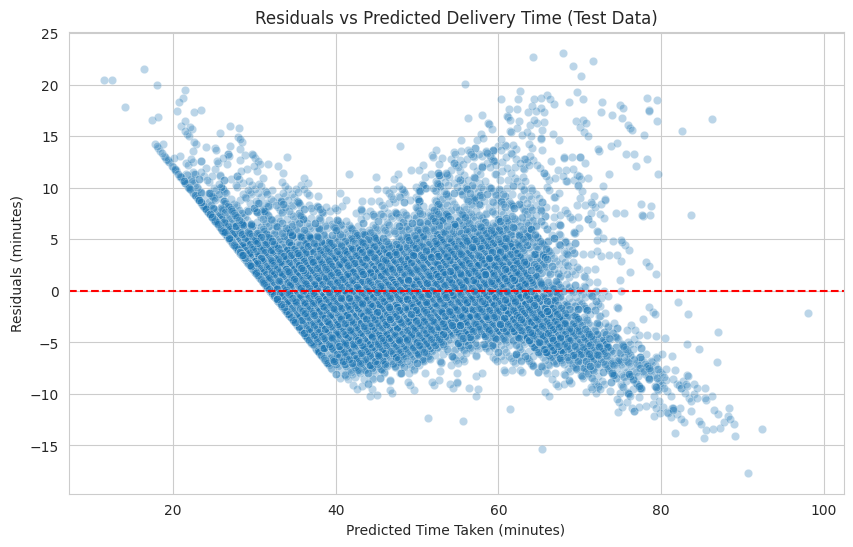

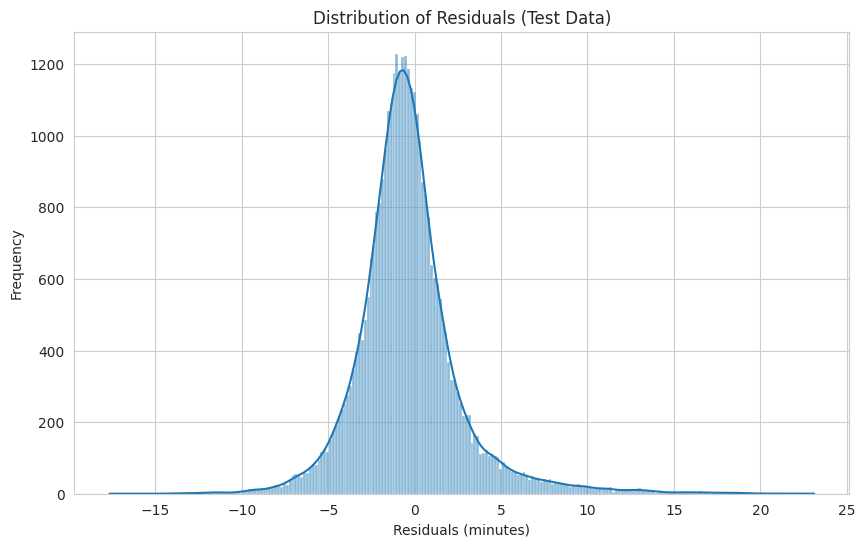

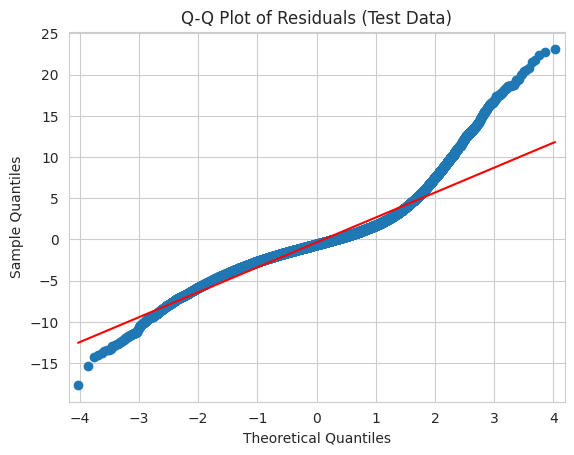

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_rfe

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rfe, y=residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Delivery Time (Test Data)')
plt.xlabel('Predicted Time Taken (minutes)')
plt.ylabel('Residuals (minutes)')
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Test Data)')
plt.xlabel('Residuals (minutes)')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals (Test Data)')
plt.show()

[Your inferences here:]

Based on the residual analysis plots:

*   **Residuals vs Predicted plot:** The scatter plot shows a general band of residuals around zero, but there appears to be a "fanning out" effect, where the spread of residuals increases as the predicted delivery time increases. This suggests that the assumption of homoscedasticity (constant variance of errors) might be violated. The variance of the errors is not constant across all predicted values.
*   **Distribution of Residuals histogram:** The histogram of residuals is somewhat bell-shaped and centered around zero, indicating that the residuals are approximately normally distributed. However, there might be slight skewness or heavier tails than a perfect normal distribution.
*   **Q-Q plot:** The points on the Q-Q plot generally follow the straight line, particularly in the center. There are some deviations at the tails, suggesting that the residuals might not be perfectly normally distributed, which is consistent with the histogram.

Inference: The residual analysis suggests that while the model's errors are roughly normally distributed and centered around zero, the assumption of homoscedasticity is likely violated due to the increasing spread of residuals with higher predicted values. This indicates that the model's predictions might be less reliable for longer delivery times.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# To understand the effect of a unit change in a feature on the original scale,
# we need to use the unscaled coefficients.
# We will train a separate OLS model using the original, unscaled data with the RFE selected features.

# First, get the original unscaled data. We need to reload the original data to ensure 'time_taken' is present.
original_df = pd.read_csv('porter_data_1.csv')

# Convert 'created_at' and 'actual_delivery_time' columns to datetime format in the original_df
original_df['created_at'] = pd.to_datetime(original_df['created_at'])
original_df['actual_delivery_time'] = pd.to_datetime(original_df['actual_delivery_time'])

# Calculate time taken in minutes in the original_df
original_df['time_taken'] = (original_df['actual_delivery_time'] - original_df['created_at']).dt.total_seconds() / 60

# Extract order_hour, order_day_of_week, and isWeekend from original_df
original_df['order_hour'] = original_df['created_at'].dt.hour.astype('category')
original_df['order_day_of_week'] = original_df['created_at'].dt.dayofweek.astype('category')
original_df['isWeekend'] = original_df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

# Drop the original timestamp columns from original_df
original_df = original_df.drop(['created_at', 'actual_delivery_time'], axis=1)

# Convert categorical features to category type in original_df
original_categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']
for col in original_categorical_cols:
    original_df[col] = original_df[col].astype('category')


# Perform one-hot encoding on the original_df
df_encoded_unscaled = pd.get_dummies(original_df, columns=original_categorical_cols, drop_first=True).astype(int)

# Separate features (X) and target (y) from the unscaled encoded dataframe
y_unscaled = df_encoded_unscaled.pop('time_taken')
X_unscaled = df_encoded_unscaled

# Split the unscaled data, ensuring the same split as before (using the same random_state)
# We will use the indices from the X_train and X_test DataFrames (which retain their original indices)
X_train_unscaled = X_unscaled.loc[X_train.index]
X_test_unscaled = X_unscaled.loc[X_test.index]
y_train_unscaled = y_unscaled.loc[y_train.index]
y_test_unscaled = y_unscaled.loc[y_test.index]

# Get the list of selected features from the RFE results (assuming 37 features were selected as discussed)
# You can choose a different number of features based on your analysis of the RFE results_df
# For example, to get the selected features for 37 features:
selected_rfe_features = results_df[results_df['n_features'] == 37]['selected_features'].iloc[0]


# Filter the unscaled dataframes to keep only the RFE selected features
X_train_unscaled_rfe = X_train_unscaled[selected_rfe_features]
X_test_unscaled_rfe = X_test_unscaled[selected_rfe_features]

# Add a constant to the unscaled RFE features for statsmodels
X_train_unscaled_rfe_sm = sm.add_constant(X_train_unscaled_rfe)

# Build and fit the OLS model on unscaled data
lr_model_unscaled = sm.OLS(y_train_unscaled, X_train_unscaled_rfe_sm).fit()

print("\nModel Summary with Unscaled Features (RFE Selected):")
print(lr_model_unscaled.summary())


Model Summary with Unscaled Features (RFE Selected):
                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 3.604e+04
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:44:27   Log-Likelihood:            -3.4820e+05
No. Observations:              140621   AIC:                         6.965e+05
Df Residuals:                  140583   BIC:                         6.969e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
# Compare the scaled vs unscaled features used in the final model

# Get the scaled coefficients from the RFE model
scaled_coefficients = pd.DataFrame(lr_model_rfe.params, columns=['Scaled Coefficient'])
scaled_coefficients = scaled_coefficients.drop('const') # Drop the constant term for interpretation

print("Scaled Coefficients:")
display(scaled_coefficients)

# To compare with unscaled coefficients, we need the model trained on unscaled data
# with the same features selected by RFE.
# We already trained this model in the previous cell (dMHN7r-x-Lp5).

# Get the unscaled coefficients from the unscaled OLS model
unscaled_coefficients = pd.DataFrame(lr_model_unscaled.params, columns=['Unscaled Coefficient'])
unscaled_coefficients = unscaled_coefficients.drop('const') # Drop the constant term

print("\nUnscaled Coefficients (RFE Selected Features):")
display(unscaled_coefficients)

# Combine scaled and unscaled coefficients for comparison
combined_coefficients = scaled_coefficients.join(unscaled_coefficients)
print("\nComparison of Scaled and Unscaled Coefficients:")
display(combined_coefficients)

Scaled Coefficients:


Scaled Coefficient
total_items                         1.466953
subtotal                            9.407730
num_distinct_items                  0.463358
max_item_price                      1.382201
total_onshift_dashers             -49.799186
total_busy_dashers                -17.058253
total_outstanding_orders           67.979956
distance                           22.525442
market_id_2.0                      -4.843635
market_id_3.0                      -4.054339
market_id_4.0                      -4.161970
market_id_5.0                      -3.339441
market_id_6.0                      -2.815591
order_protocol_2.0                 -0.725810
order_protocol_3.0                 -1.432535
order_protocol_4.0                 -1.850022
order_protocol_5.0                 -2.776395
order_protocol_6.0                 -1.383617
order_protocol_7.0                 -1.333000
order_hour_1                       -0.378621
order_hour_2                       -0.852806
order_hour_3                       -1.090344
order_hour_4                       -2.074100
order_hour_5                       -2.012528
order_hour_6                       -1.839619
order_hour_7                       -2.349997
order_hour_8                       -0.631785
order_hour_14                      -2.042875
order_hour_15                      -2.235352
order_hour_16                      -2.715280
order_hour_17                      -3.168977
order_hour_18                      -3.881605
order_hour_19                      -4.639887
order_hour_20                      -4.909970
order_hour_21                      -4.684456
order_hour_22                      -4.633922
order_hour_23                      -4.548728
isWeekend_1                         1.482118


Unscaled Coefficients (RFE Selected Features):


Unscaled Coefficient
total_items                          -0.037816
subtotal                              0.001223
num_distinct_items                    0.519947
max_item_price                        0.000645
total_onshift_dashers                -0.346744
total_busy_dashers                   -0.130346
total_outstanding_orders              0.342146
distance                              0.484434
market_id_2.0                        -4.609424
market_id_3.0                        -4.288324
market_id_4.0                        -3.772743
market_id_5.0                        -3.507614
market_id_6.0                        -2.775418
order_protocol_2.0                   -0.696277
order_protocol_3.0                   -1.410040
order_protocol_4.0                   -1.853532
order_protocol_5.0                   -2.701424
order_protocol_6.0                   -1.530185
order_protocol_7.0                   -1.749435
order_hour_2                         -0.358842
order_hour_3                         -1.018088
order_hour_4                         -1.716976
order_hour_5                         -2.088499
order_hour_6                         -1.986379
order_hour_7                         -2.484039
order_hour_8                         -1.515082
order_hour_14                        -2.293811
order_hour_15                        -2.622756
order_hour_16                        -3.167247
order_hour_17                        -3.574430
order_hour_18                        -4.278096
order_hour_19                        -4.699599
order_hour_20                        -4.815552
order_hour_21                        -4.741930
order_hour_22                        -4.793637
order_hour_23                        -4.758318
isWeekend_1                           1.144398


Comparison of Scaled and Unscaled Coefficients:


Scaled Coefficient  Unscaled Coefficient
total_items                         1.466953             -0.037816
subtotal                            9.407730              0.001223
num_distinct_items                  0.463358              0.519947
max_item_price                      1.382201              0.000645
total_onshift_dashers             -49.799186             -0.346744
total_busy_dashers                -17.058253             -0.130346
total_outstanding_orders           67.979956              0.342146
distance                           22.525442              0.484434
market_id_2.0                      -4.843635             -4.609424
market_id_3.0                      -4.054339             -4.288324
market_id_4.0                      -4.161970             -3.772743
market_id_5.0                      -3.339441             -3.507614
market_id_6.0                      -2.815591             -2.775418
order_protocol_2.0                 -0.725810             -0.696277
order_protocol_3.0                 -1.432535             -1.410040
order_protocol_4.0                 -1.850022             -1.853532
order_protocol_5.0                 -2.776395             -2.701424
order_protocol_6.0                 -1.383617             -1.530185
order_protocol_7.0                 -1.333000             -1.749435
order_hour_1                       -0.378621                   NaN
order_hour_2                       -0.852806             -0.358842
order_hour_3                       -1.090344             -1.018088
order_hour_4                       -2.074100             -1.716976
order_hour_5                       -2.012528             -2.088499
order_hour_6                       -1.839619             -1.986379
order_hour_7                       -2.349997             -2.484039
order_hour_8                       -0.631785             -1.515082
order_hour_14                      -2.042875             -2.293811
order_hour_15                      -2.235352             -2.622756
order_hour_16                      -2.715280             -3.167247
order_hour_17                      -3.168977             -3.574430
order_hour_18                      -3.881605             -4.278096
order_hour_19                      -4.639887             -4.699599
order_hour_20                      -4.909970             -4.815552
order_hour_21                      -4.684456             -4.741930
order_hour_22                      -4.633922             -4.793637
order_hour_23                      -4.548728             -4.758318
isWeekend_1                         1.482118              1.144398

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
unscaled_coefficient_total_items = lr_model_unscaled.params['total_items']
print(f"\nEffect of a unit change in original 'total_items' on 'time_taken': {unscaled_coefficient_total_items:.4f} minutes")



Effect of a unit change in original 'total_items' on 'time_taken': -0.0378 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, the dataset initially contained **market_id**, **store_primary_category**, and **order_protocol** as categorical variables. During feature engineering, **order_hour**, **order_day_of_week**, and **isWeekend** were also created and treated as categorical features.

From the correlation analysis, **order_hour** showed strongest relationship with time_taken (correlation of -0.35). Other features like **order_protocol** (-0.14) and **isWeekend** (0.14) also showed a mild correlation. The analysis determined that **store_primary_category** and **order_day_of_week** had very weak correlations and were dropped from the model. This suggests that the time of day an order is placed, the market, and the protocol used have a measurable influence on the delivery time, while the specific day of the week (beyond it being a weekend or not) and the restaurant category were less impactful.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
During the splitting of the data into training and test sets, `test_size = 0.2` refers to the proportion of the dataset that will be allocated to the test set. In this case, 20% of the data will be used for testing the model, and the remaining 80% will be used for training the model. This split is a common practice to evaluate the model's performance on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
Looking at the "Correlation Matrix of Numerical Features and Time Taken" heatmap, the numerical feature with the highest absolute correlation with the target variable **time_taken** is **distance**, which has a correlation coefficient of 0.46.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
My approach to detect outliers involved using visualizations like boxplots for both the target variable (`time_taken`) and other numerical features in the training set. Boxplots visually represent the distribution of data and clearly show points that fall outside the whiskers, which are typically considered outliers.

To address the outliers, I used the Interquartile Range (IQR) method. For each numerical column and the target variable, I calculated the first quartile (Q1) and the third quartile (Q3). The IQR is the difference between Q3 and Q1. Outliers were defined as values falling below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`. Instead of removing these outliers, I chose to cap and floor them using the calculated lower and upper bounds. This means that any value below the lower bound was set to the lower bound, and any value above the upper bound was set to the upper bound. This method helps to reduce the impact of extreme values without removing data points, which can be beneficial, especially with a large dataset. After applying the capping and flooring, I re-plotted the boxplots to confirm that the outliers were handled.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Based on the "Model Summary with Unscaled Features (RFE Selected)", the top 3 features with the largest absolute coefficient values (and thus the most significant impact on delivery time in minutes) are:
1.  **distance**: This feature has the largest positive coefficient (0.4844), indicating that for each unit increase in distance, the delivery time increases by approximately 0.48 minutes, holding other features constant.
2.  **total_onshift_dashers**: This feature has a large negative coefficient (-0.3467), indicating that for each additional dasher on shift, the delivery time decreases by approximately 0.35 minutes.
3.  **total_outstanding_orders**: This feature has a large positive coefficient (0.3421), indicating that for each additional outstanding order, the delivery time increases by approximately 0.34 minutes.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more input features (predictor variables). The goal of linear regression is to find a linear relationship between the input features and the target variable.

In simple linear regression, there is only one input feature, and the relationship is represented by a straight line:

$y = \beta_0 + \beta_1x + \epsilon$

where:
- $y$ is the target variable.
- $x$ is the input feature.
- $\beta_0$ is the y-intercept (the value of y when x is 0).
- $\beta_1$ is the slope of the line (the change in y for a one-unit change in x).
- $\epsilon$ is the error term, representing the part of y that cannot be explained by the linear relationship.

In multiple linear regression, there are two or more input features, and the relationship is represented by a hyperplane:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

where:
- $y$ is the target variable.
- $x_1, x_2, ..., x_n$ are the input features.
- $\beta_0$ is the y-intercept.
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each input feature, representing the change in y for a one-unit change in the corresponding feature, holding other features constant.
- $\epsilon$ is the error term.

The algorithm learns the optimal values for the coefficients ($\beta_0, \beta_1, ..., \beta_n$) by minimizing a cost function. The most common cost function is the Mean Squared Error (MSE), which calculates the average of the squared differences between the actual target values and the predicted target values.

The minimization of the cost function is typically done using optimization techniques like Gradient Descent or by using the Ordinary Least Squares (OLS) method, which provides a closed-form solution for the coefficients. The goal is to find the coefficients that result in the line or hyperplane that best fits the training data, minimizing the errors between the predicted and actual values. Once the model is trained, it can be used to predict the target variable for new, unseen data.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
The main difference between simple linear regression and multiple linear regression lies in the number of independent (predictor) variables used to predict the dependent (target) variable:

*   **Simple Linear Regression:** Uses only **one** independent variable to predict the dependent variable. The relationship is modeled as a straight line. The equation is $y = \beta_0 + \beta_1x + \epsilon$.

*   **Multiple Linear Regression:** Uses **two or more** independent variables to predict the dependent variable. The relationship is modeled as a hyperplane in a multi-dimensional space. The equation is $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$.

In essence, multiple linear regression is an extension of simple linear regression to handle scenarios where the target variable is influenced by multiple factors.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The role of the cost function in linear regression is to quantify the error between the predicted values of the model and the actual target values from the training data. It serves as a measure of how well the linear model is fitting the data. A lower cost function value indicates a better fit.

The most common cost function for linear regression is the **Mean Squared Error (MSE)**. It is calculated as the average of the squared differences between the actual values ($y_i$) and the predicted values ($\hat{y}_i$) for all data points:

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

Minimizing the cost function means finding the values of the model coefficients ($\beta_0, \beta_1, ..., \beta_n$) that result in the smallest possible MSE. This is typically achieved through optimization algorithms:

1.  **Ordinary Least Squares (OLS):** This is a closed-form solution that directly calculates the optimal coefficients by minimizing the sum of the squared residuals. It's computationally efficient for smaller datasets but can be less practical for very large datasets or when dealing with complex models.

2.  **Gradient Descent:** This is an iterative optimization algorithm. It starts with initial values for the coefficients and then repeatedly adjusts them in the direction that decreases the cost function most steeply. The "gradient" refers to the slope of the cost function with respect to each coefficient. The learning rate parameter controls the size of the steps taken during each iteration. Gradient Descent is widely used, especially for large datasets and in more complex machine learning models.

By minimizing the cost function, the linear regression algorithm finds the line (or hyperplane) that best represents the linear relationship between the features and the target variable, thereby providing the best possible predictions based on the given data and the linear model assumption.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting and underfitting are two common problems in machine learning that describe how well a model generalizes to new, unseen data:

*   **Overfitting:** This occurs when a model learns the training data too well, including the noise and outliers. An overfitted model performs exceptionally well on the training data but poorly on the test data (and new data). It is too complex and has essentially memorized the training examples rather than learning the underlying patterns. Visualizing an overfitted model's performance often shows a training error that is very low, while the test error is significantly higher.

*   **Underfitting:** This occurs when a model is too simple to capture the underlying patterns in the training data. An underfitted model performs poorly on both the training data and the test data. It fails to learn the relationships between the features and the target variable. Visualizing an underfitted model's performance often shows both training and test errors that are high and relatively close to each other.

The goal in model building is to find a model that achieves a good balance between underfitting and overfitting, generalizing well to new data. This is often achieved through techniques like cross-validation, regularization, and adjusting model complexity.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots are valuable diagnostic tools in linear regression for assessing whether the assumptions of the linear model are met and identifying potential issues. Residuals are the differences between the observed (actual) values and the predicted values from the regression model ($e_i = y_i - \hat{y}_i$). Plotting these residuals in various ways can reveal patterns that the model has not captured.

Here's how residual plots help in diagnosing a linear regression model:

1.  **Checking for Linearity:** A residual plot where residuals are plotted against the predicted values (or against an independent variable) should show a random scatter of points around the horizontal line at zero. If there's a discernible pattern (e.g., a curve), it suggests that the relationship between the variables is not linear, and a linear model may not be appropriate.

2.  **Checking for Homoscedasticity (Constant Variance):** Homoscedasticity assumes that the variance of the residuals is constant across all levels of the independent variables. In a residual plot, this is indicated by a roughly equal spread of points above and below the zero line across the range of predicted values. If the spread of residuals increases or decreases as the predicted values change (creating a funnel or cone shape), it suggests heteroscedasticity, which violates a key assumption of linear regression and can lead to biased standard errors.

3.  **Checking for Independence of Errors:** The assumption of independent errors means that the residuals are not correlated with each other. While a standard residual vs. predicted plot doesn't directly show independence over time or sequence, plotting residuals against the order of data collection (if applicable) can reveal patterns like autocorrelation.

4.  **Identifying Outliers and Influential Points:** Residual plots can help spot outliers (points with large residuals) and influential points (points that significantly impact the regression line). Points that fall far from the cluster of other residuals on the plot are potential outliers.

5.  **Checking for Normality of Residuals:** A histogram or a Q-Q plot of the residuals can help assess whether the residuals are normally distributed. While linear regression doesn't strictly require normally distributed residuals for estimating coefficients, it is important for valid statistical inference (e.g., hypothesis testing, confidence intervals). Deviations from normality can suggest issues with the model or data.

In summary, residual plots provide a visual way to examine the errors of a linear regression model and identify deviations from the model's assumptions, guiding further model refinement or indicating the need for a different modeling approach.

## Conclusion

Based on the linear regression model built to predict delivery time, here are the key takeaways:

**Insights:**
* The model achieved an R-squared of approximately 0.89 on the test set, indicating that about 89% of the variance in delivery time can be explained by the selected features. This suggests the model has a strong predictive capability.

* The residual analysis showed a relatively normal distribution of errors centered around zero, which is a positive sign. However, the scatter plot of residuals versus predicted values shows some fanning out, suggesting potential heteroscedasticity (non-constant variance of errors), especially at higher predicted delivery times.

* Coefficient analysis on the unscaled data revealed the significant impact of certain features on delivery time:

* distance has the largest positive coefficient (0.4844), indicating that longer delivery distances result in significantly increased delivery time. This is a fundamental factor in delivery logistics.

* total_onshift_dashers has a large negative coefficient (-0.3467), suggesting that a higher number of available dashers leads to significantly shorter delivery times. This is expected, as more available resources can handle orders more efficiently.

* total_outstanding_orders has a substantial positive coefficient (0.3421), indicating that as the number of pending orders increases, delivery time also significantly increases. This aligns with intuition, as more outstanding orders likely lead to increased workload and delays.

* Categorical features related to order_hour show significant negative coefficients, suggesting orders placed during evening and late-night hours (19:00 to 23:00) have shorter delivery times compared to the baseline.

* market_id and order_protocol dummy variables also show significant negative coefficients, suggesting certain markets and order methods are associated with shorter delivery times compared to the baseline.

**Assumptions:**

*   **Linearity:** The model assumes a linear relationship between the selected features and the target variable. While the residual plot did not show a strong curved pattern, the fanning out suggests that the linear assumption might not hold perfectly across the entire range of predicted values.
*   **Independence of Errors:** The model assumes that the errors are independent. We did not explicitly check for temporal autocorrelation, which could be relevant for time-series data like this.
*   **Homoscedasticity:** The model assumes constant variance of errors. The residual plot indicates that this assumption might be violated, as the spread of residuals appears to increase with higher predicted values.
*   **Normality of Residuals:** While not strictly required for coefficient estimation, the model assumes normally distributed residuals for valid statistical inference. The histogram and Q-Q plot of residuals show a distribution that is close to normal but with some skewness and heavier tails, suggesting potential deviations.
*   **No Multicollinearity:** The model assumes that the independent variables are not highly correlated with each other. We performed a correlation analysis and used RFE, which helps to mitigate multicollinearity by selecting a subset of features. The condition number in the unscaled model summary is large, which can indicate multicollinearity or other numerical issues, suggesting that some correlation might still exist among the selected features on the original scale.

**Recommendations:**

*   **Address Heteroscedasticity:** Investigate methods to address the observed heteroscedasticity, such as transforming the target variable (e.g., using a logarithmic transformation) or using robust standard errors in the regression model.
*   **Explore Non-Linear Relationships:** Consider exploring non-linear regression models or incorporating interaction terms between features to capture more complex relationships if the residual analysis strongly suggests non-linearity.
*   **Time Series Analysis:** Given the time-stamped nature of the data, explore time series analysis techniques to account for potential temporal patterns or autocorrelation in delivery times.
*   **Feature Engineering:** Further investigate feature engineering possibilities, such as creating features related to peak hours, weather conditions (if available), or historical delivery times for specific restaurants or areas.
*   **Model Evaluation Metrics:** While RMSE and R-squared are good metrics, consider using other metrics like Mean Absolute Error (MAE) which is less sensitive to outliers, or metrics relevant to business goals (e.g., percentage of deliveries within a target time).
*   **Validation on New Data:** Continuously validate the model's performance on new, unseen data to ensure it maintains its predictive accuracy over time and retrain the model periodically with updated data.
*   **Investigate Outliers:** Although outliers were handled by capping and flooring, it might be beneficial to investigate the characteristics of the capped orders to understand the underlying reasons for extremely long or short delivery times.
*   **Business Interpretation:** Work closely with business stakeholders to interpret the coefficients and model insights in the context of real-world delivery operations to identify actionable strategies for optimizing delivery times.